In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
sys.path.insert(0, "/Users/weilu/openmmawsem")
from helperFunctions.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [ ]:
os.chdir('/Users/weilu/opt/notebook/Optimization')

In [ ]:
cutoff = 600
pre = "/Users/weilu/Research/server/feb_2020/cath_dataset_shuffle_optimization/three_well_optimization_iter0/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = "iter0"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "shuffle", 1000, mode=0)
dataFile = f"/Users/weilu/Research/data/optimization_2020_{trial_name}_{cutoff}_{trial_name}.csv"
data.to_csv(dataFile)
print(dataFile)


In [8]:
cutoff = 600
pre = "/Users/weilu/Research/server/feb_2020/cath_dataset_shuffle_optimization/optimization_iter0/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = "iter0"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "shuffle", 1000, mode=0)
dataFile = f"/Users/weilu/Research/data/optimization_2020_cath_{trial_name}_{cutoff}_{trial_name}.csv"
data.to_csv(dataFile)
print(dataFile)


/Users/weilu/Research/server/feb_2020/cath_dataset_shuffle_optimization/optimization_iter0//saved_gammas/iter0_cutoff600_impose_Aprime_constraint
0 6.7438470062754
/Users/weilu/Research/data/optimization_2020_cath_iter0_600_iter0.csv


In [29]:
data_standard = pd.read_csv("/Users/weilu/Research/data/optimization_2020_cath_iter0_600_iter0.csv", index_col=0)
data_three_well = pd.read_csv('/Users/weilu/Research/data/optimization_2020_iter0_600_iter0.csv', index_col=0)

data_standard = data_standard.sort_values("Z_scores").reset_index(drop=True).reset_index()
data_three_well = data_three_well.sort_values("Z_scores").reset_index(drop=True).reset_index()

In [32]:
data = pd.concat([data_standard.assign(Hamiltonian="standard"), data_three_well.assign(Hamiltonian="three_well")])

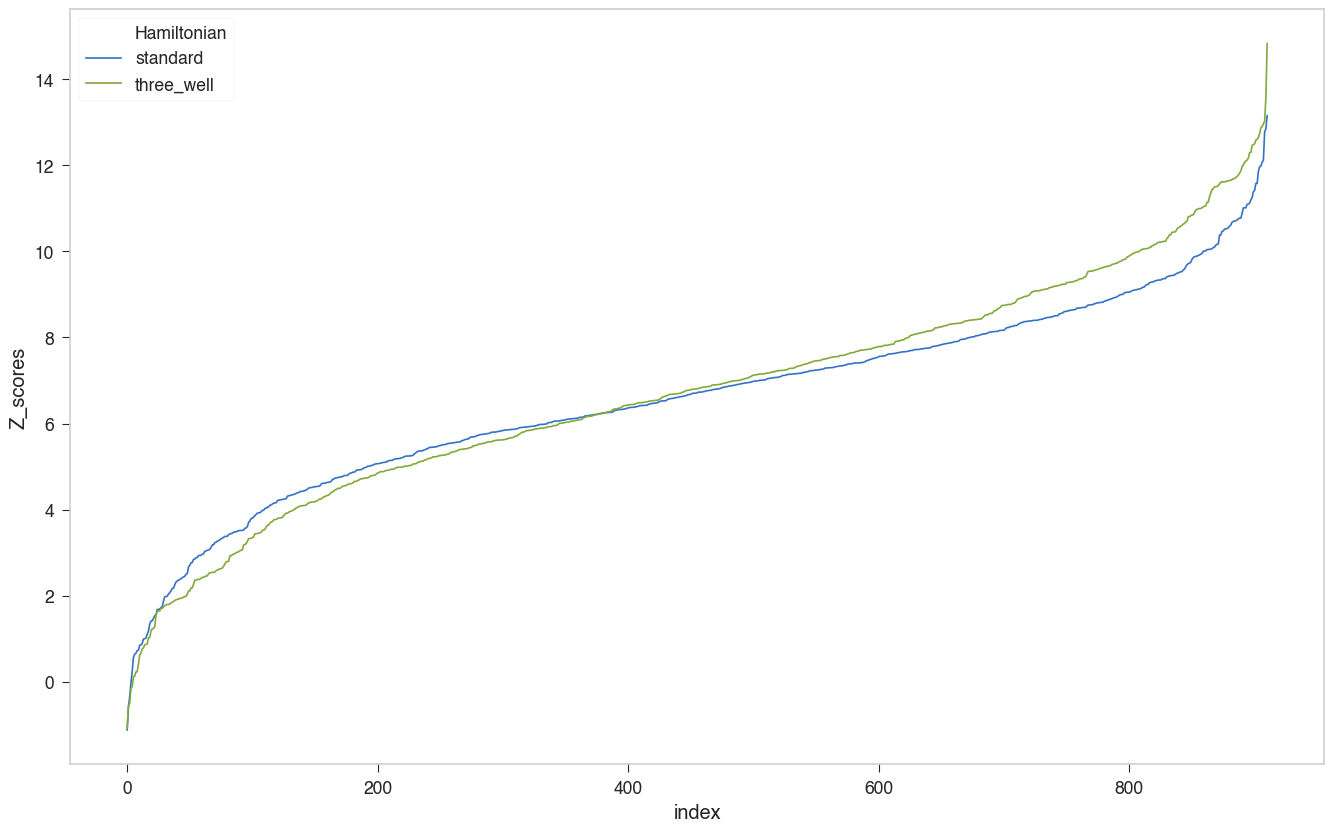

In [35]:
sns.lineplot("index", "Z_scores", hue="Hamiltonian", data=data)

# iteration 2

/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter2//saved_gammas/iter2_cutoff400_impose_Aprime_constraint
0 4.4233380351140195


Text(0.5, 1.0, 'optimization_gamma_cutoff400')

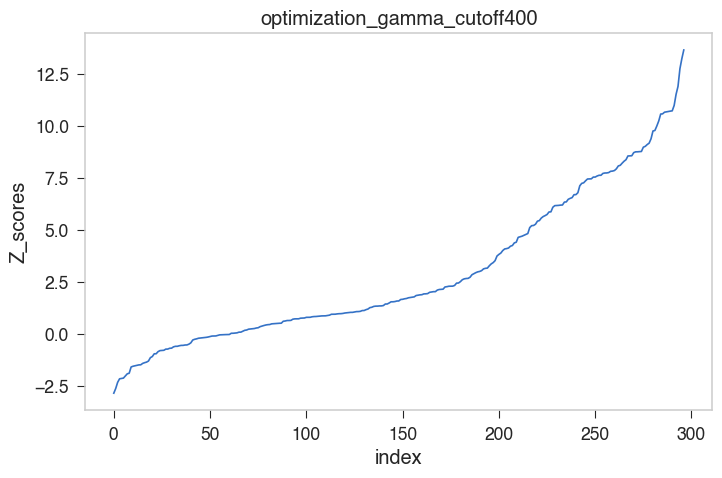

In [91]:
cutoff = 400
i = 2
pre = f"/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter{i}/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = f"iter{i}"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = "/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter1/iter_1_30"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_complete", gamma_file_name, "openMM", 50, mode=0)
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("optimization_gamma_cutoff400")

/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter2//saved_gammas/iter2_cutoff300_impose_Aprime_constraint
0 4.049148081711622


Text(0.5, 1.0, 'optimization_gamma_cutoff300')

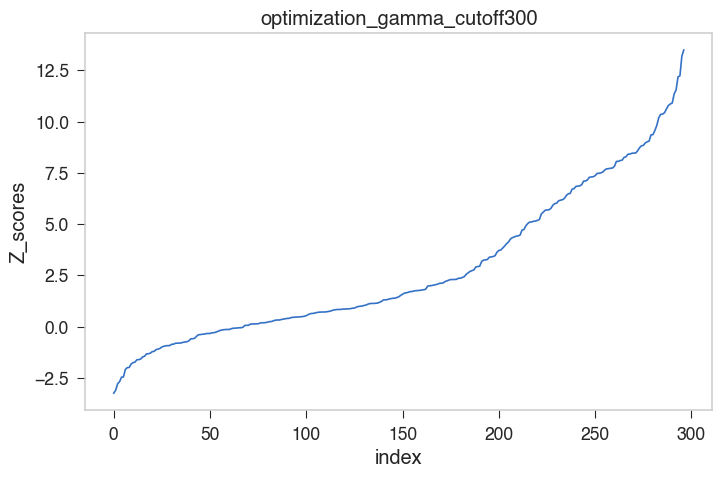

In [90]:
cutoff = 300
i = 2
pre = f"/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter{i}/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = f"iter{i}"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = "/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter1/iter_1_30"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_complete", gamma_file_name, "openMM", 50, mode=0)
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("optimization_gamma_cutoff300")

/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter1/iter_1_30
0 0.8007013665370382


Text(0.5, 1.0, 'optimization_gamma_cutoff300')

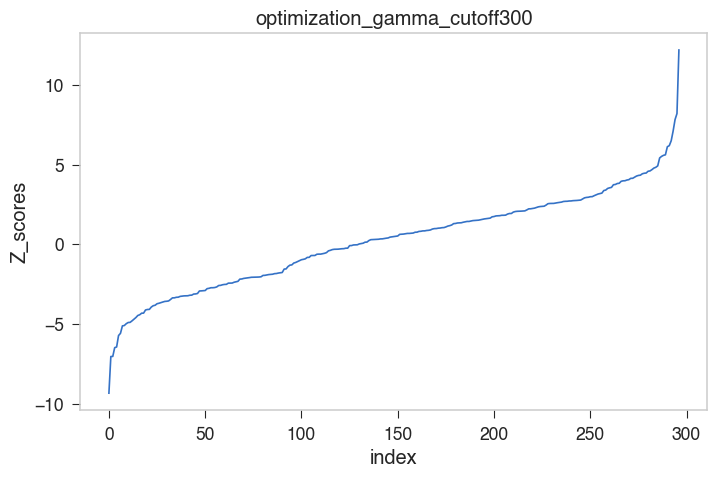

In [88]:
cutoff = 300
i = 2
pre = f"/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter{i}/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = f"iter{i}"
# gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
gamma_file_name = "/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter1/iter_1_30"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_complete", gamma_file_name, "openMM", 50, mode=0)
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("optimization_gamma_cutoff300")

/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter1/iter_1_30
0 -3.4703192659227886


Text(0.5, 1.0, 'optimization_gamma_cutoff300')

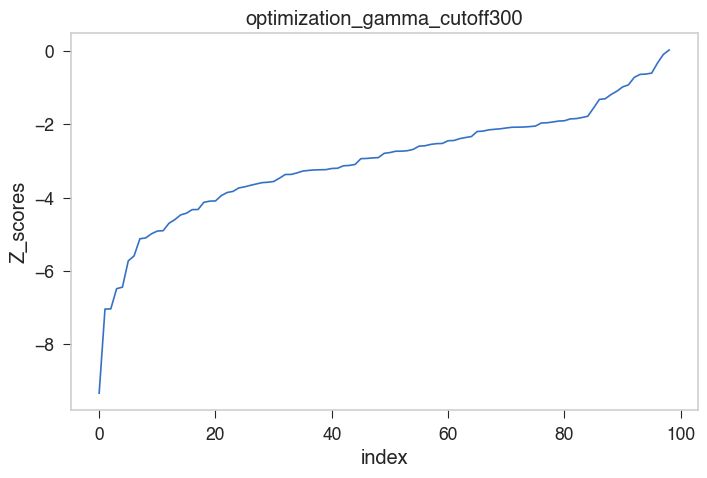

In [89]:
cutoff = 300
i = 2
pre = f"/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter{i}/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = f"iter{i}"
# gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
gamma_file_name = "/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter1/iter_1_30"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 50, mode=0)
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("optimization_gamma_cutoff300")

# iteration 1

In [75]:
cutoff = 100
i = 1
pre = f"/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter{i}/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = f"iter{i}"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_complete", gamma_file_name, "openMM", 50, mode=0)
dataFile = f"/Users/weilu/Research/data/optimization_2020_mass_specific_deocys_{trial_name}_{cutoff}_{trial_name}.csv"
data.to_csv(dataFile)
print(dataFile)


/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter1//saved_gammas/iter1_cutoff100_impose_Aprime_constraint
0 3.3679547936516134
/Users/weilu/Research/data/optimization_2020_mass_specific_deocys_iter1_100_iter1.csv


Text(0.5, 1.0, 'optimization_gamma_cutoff100')

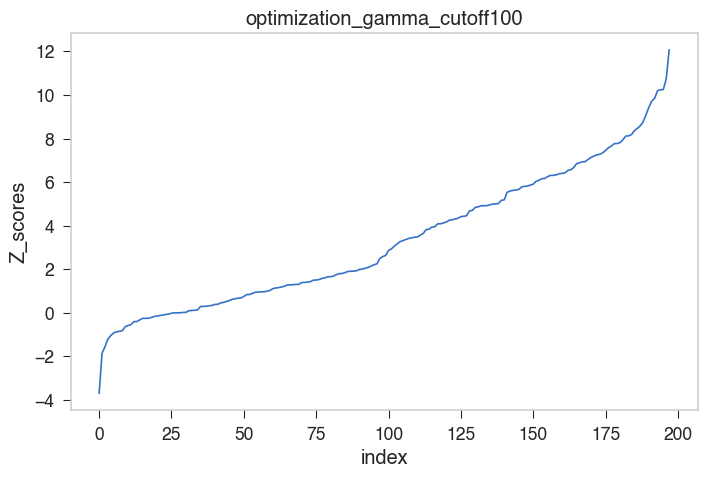

In [76]:
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("optimization_gamma_cutoff100")

/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter1//saved_gammas/iter1_cutoff300_impose_Aprime_constraint
0 3.940622839693749


Text(0.5, 1.0, 'optimization_gamma_cutoff300')

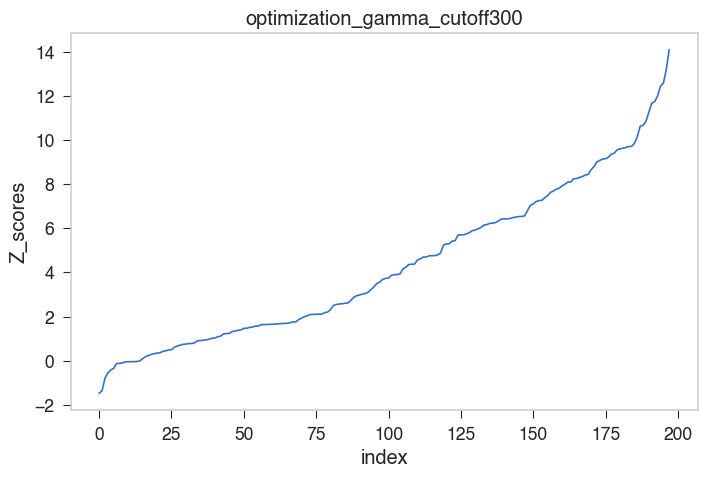

In [84]:
cutoff = 300
i = 1
pre = f"/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter{i}/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = f"iter{i}"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_complete", gamma_file_name, "openMM", 50, mode=0)
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("optimization_gamma_cutoff300")

/Users/weilu/opt/parameters/original_gamma
0 -3.412514346007094


Text(0.5, 1.0, 'original_gamma')

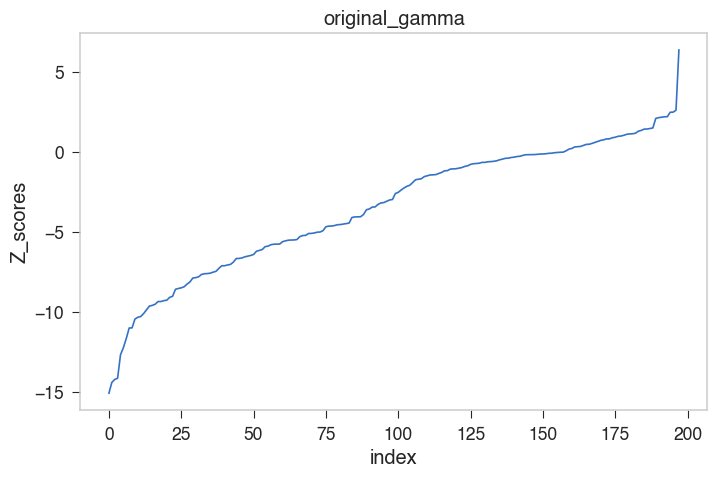

In [77]:
cutoff = 100
i = 1
pre = f"/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter{i}/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = f"iter{i}"
# gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_complete", gamma_file_name, "openMM", 50, mode=0)
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("original_gamma")

/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter0/iter_0_30
0 1.2852675230856065


Text(0.5, 1.0, 'iter_0_30')

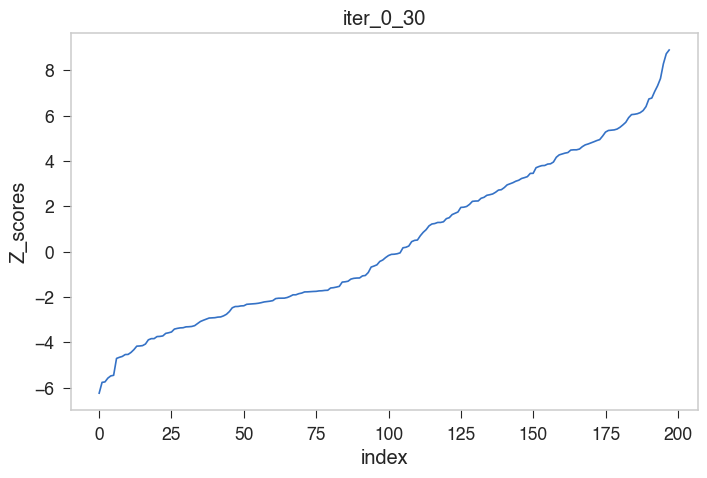

In [79]:
cutoff = 100
i = 1
pre = f"/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter{i}/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = f"iter{i}"
# gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_file_name = "/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter0/iter_0_30"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_complete", gamma_file_name, "openMM", 50, mode=0)
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("iter_0_30")

/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter1/iter_1_30
0 0.8007013665370382


Text(0.5, 1.0, 'iter_1_30')

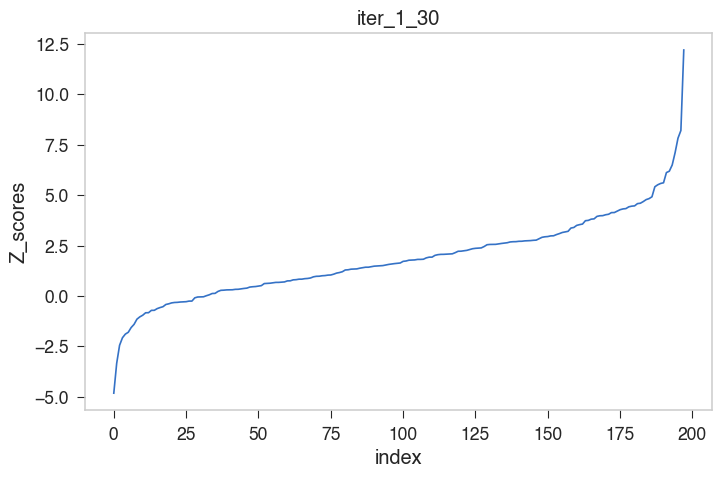

In [81]:
cutoff = 100
i = 1
pre = f"/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter{i}/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = f"iter{i}"
# gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_file_name = "/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter1/iter_1_30"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_complete", gamma_file_name, "openMM", 50, mode=0)
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("iter_1_30")

In [73]:
cutoff = 100
pre = "/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter0/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = "iter0"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 50, mode=0)
dataFile = f"/Users/weilu/Research/data/optimization_2020_mass_specific_deocys_{trial_name}_{cutoff}_{trial_name}.csv"
data.to_csv(dataFile)
print(dataFile)


/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter0//saved_gammas/iter0_cutoff100_impose_Aprime_constraint
0 3.2673298994171183
/Users/weilu/Research/data/optimization_2020_mass_specific_deocys_iter0_100_iter0.csv


Text(0.5, 1.0, 'optimization_gamma_cutoff100')

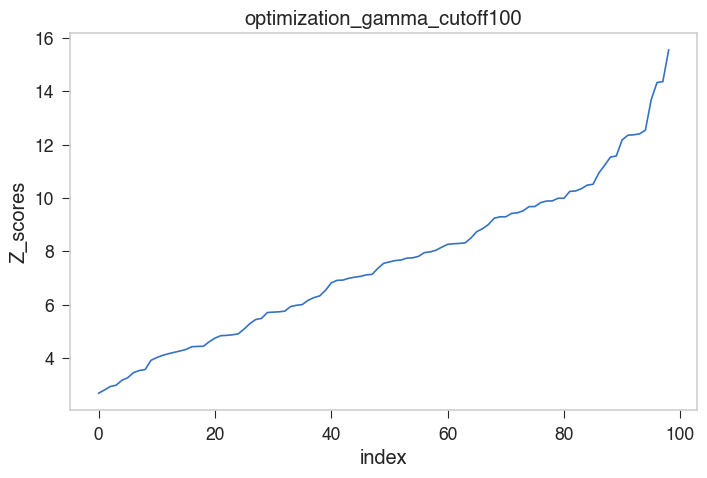

In [74]:
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("optimization_gamma_cutoff100")

In [67]:
plt.rcParams['figure.figsize'] = 0.5*np.array([16.18033, 10])    #golden ratio

In [69]:
cutoff = 100
pre = "/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter0/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = "iter0"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = "/Users/weilu/Research/server/feb_2020/cath_dataset_shuffle_optimization/optimization_iter0//saved_gammas/iter0_cutoff600_impose_Aprime_constraint"
gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
# gamma_file_name = f"{pre}/iter_0_30"

# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 50, mode=0)

/Users/weilu/opt/parameters/original_gamma
0 -3.412514346007094


Text(0.5, 1.0, 'original_gamma')

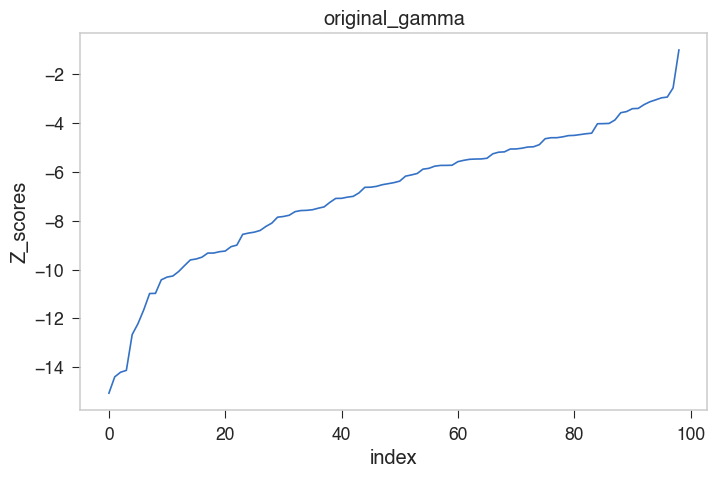

In [70]:
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("original_gamma")

In [62]:
cutoff = 100
pre = "/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter0/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = f"{pre}/saved_gammas"
trial_name = "iter0"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
gamma_file_name = "/Users/weilu/Research/server/feb_2020/cath_dataset_shuffle_optimization/optimization_iter0//saved_gammas/iter0_cutoff600_impose_Aprime_constraint"
gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_file_name = f"{pre}/iter_0_30"

# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 50, mode=0)
dataFile = f"/Users/weilu/Research/data/optimization_2020_mass_specific_deocys_{trial_name}_{cutoff}_{trial_name}.csv"
# data.to_csv(dataFile)
print(dataFile)


/Users/weilu/Research/server/feb_2020/mass_specific_decoys/optimization_iter0//iter_0_30
0 1.2852675230856065
/Users/weilu/Research/data/optimization_2020_mass_specific_deocys_iter0_100_iter0.csv


Text(0.5, 1.0, 'mixed_iter_0_30')

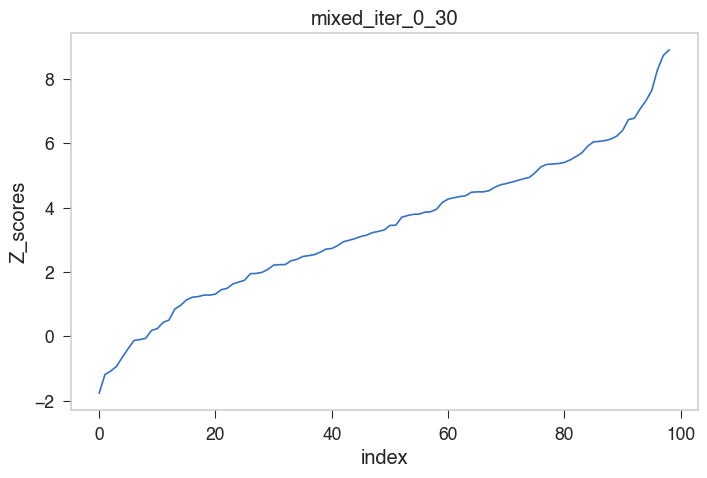

In [68]:
data = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data)
plt.title("mixed_iter_0_30")

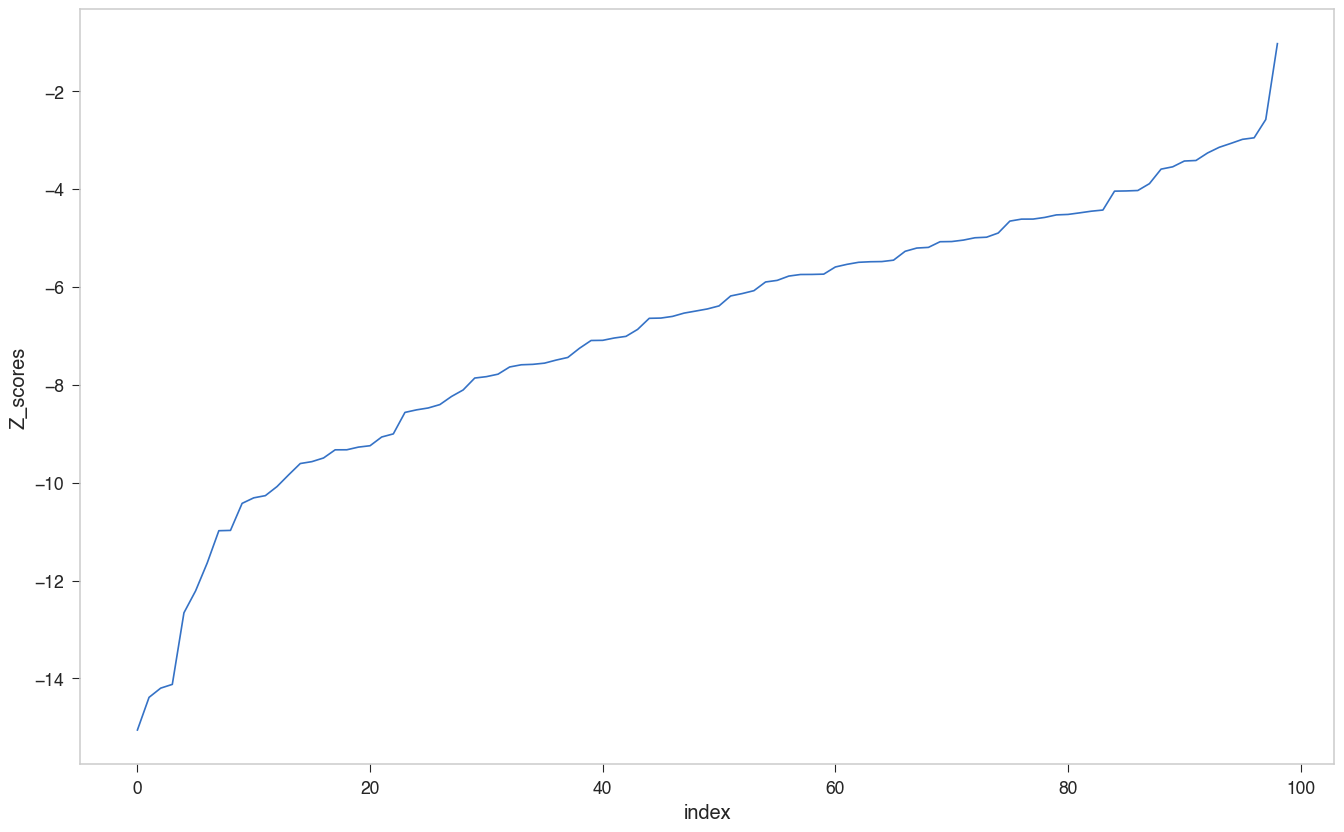

In [60]:
data_specific_decoys = data.sort_values("Z_scores").reset_index(drop=True).reset_index()
sns.lineplot("index", "Z_scores", data=data_specific_decoys)

In [39]:
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BAJ_iteration_0,9.428375,-226.207012,-5.135984,23.447416
1,1HOE_iteration_0,7.503839,-485.461830,-14.333970,62.784911
2,1HYP_iteration_0,21.203656,-235.320396,-1.618702,11.021764
3,1TIF_iteration_0,12.613545,-423.481708,-7.426257,32.984815
4,1VCC_iteration_0,10.839966,-358.586200,-7.229608,32.413072
5,1BY9_iteration_0,5.988900,-460.567829,-16.927459,74.077101
6,1BDO_iteration_0,15.584822,-488.070524,-6.919367,30.873061
7,451C_iteration_0,9.717537,-415.431560,-9.463045,41.776893
8,1CC5_iteration_0,6.247814,-288.145751,-10.114010,44.500642
9,1BB9_iteration_0,14.040275,-524.814318,-8.241070,36.792247


In [11]:
# dataFile = f"/Users/weilu/Research/data/optimization_2020_{trial_name}_{cutoff}_{trial_name}.csv"
dataFiel = '/Users/weilu/Research/data/optimization_2020_iter0_600_iter0.csv'

In [146]:
pwd

'/Users/weilu/opt/notebook/Optimization'

In [147]:
pre = "/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization/"
trial_name = "iter2"
save_gamma_pre = "saved_gammas"

In [187]:

d_ = []
for i in range(2, 5):
    d = pd.read_csv(f"/Users/weilu/Research/data/optimization_iter{i}.csv", index_col=0)
    d_.append(d.assign(iteration=f"iter_{i}"))

In [188]:
d = pd.read_csv(f"/Users/weilu/Research/data/optimization_iter4_600.csv", index_col=0)
d_.append(d.assign(iteration=f"iter_{i}_600"))

In [189]:
d = pd.read_csv(f"/Users/weilu/Research/data/optimization_iter4_500_iter4.csv", index_col=0)
d_.append(d.assign(iteration=f"iter_{i}_500_iter4"))

In [190]:
data = pd.concat(d_)

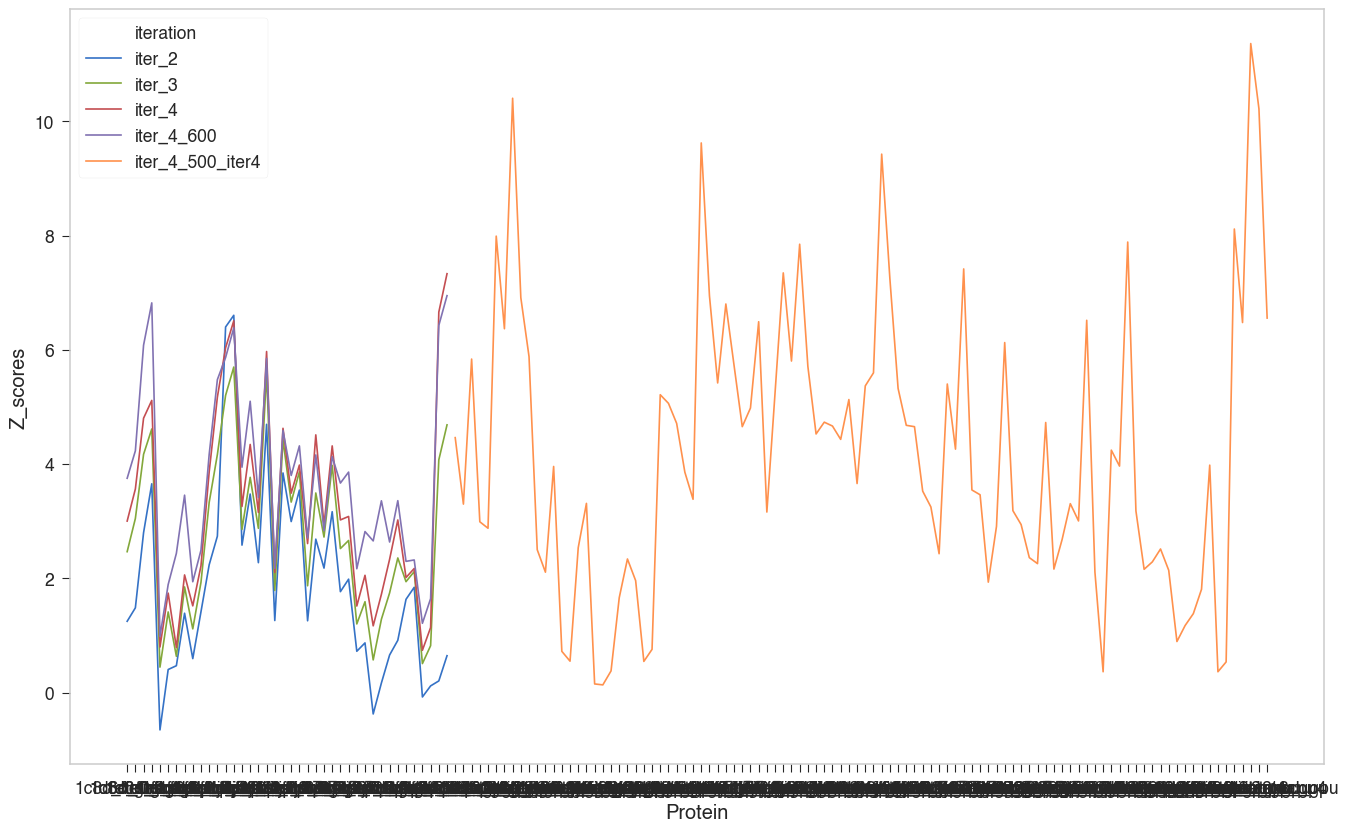

In [191]:
sns.lineplot("Protein", "Z_scores", data=data, hue="iteration")

In [183]:
cutoff = 500
pre = "/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter4/"
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = "/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter4/saved_gammas"
trial_name = "iter4"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 500, mode=0)
data.to_csv(f"/Users/weilu/Research/data/optimization_{trial_name}_{cutoff}_{trial_name}.csv")
data


/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter4/saved_gammas/iter4_cutoff500_impose_Aprime_constraint
0 3.3121770041794005


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1e0m_first_iter1_cpu4,3.312177,-36.816216,-28.915708,2.385291
1,1w4e_first_iter1_cpu4,2.257365,-60.644646,-52.772211,3.487444
2,1e0g_first_iter1_cpu4,2.107503,-57.673978,-49.647229,3.808654
3,2wqg_first_iter1_cpu4,1.808784,-67.708276,-62.111743,3.094086
4,1jo8_first_iter1_cpu4,4.665952,-85.425310,-63.991036,4.593762
5,1fex_first_iter1_cpu4,2.338628,-71.588414,-62.999750,3.672523
6,2l6r_first_iter1_cpu4,2.513647,-82.390677,-74.136316,3.283819
7,1c8c_first_iter1_cpu4,3.299335,-92.524901,-78.462282,4.262258
8,1g6p_first_iter1_cpu4,5.063909,-97.388058,-76.213946,4.181377
9,1mjc_first_iter1_cpu4,4.655057,-92.608008,-71.733297,4.484309


In [177]:
cutoff = 600
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = "/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter4/saved_gammas"
trial_name = "iter4"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 500, mode=0)
data.to_csv(f"/Users/weilu/Research/data/optimization_{trial_name}_{cutoff}.csv")
data


/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter4/saved_gammas/iter4_cutoff600_impose_Aprime_constraint
0 2.437450526865485


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1e0m_first,2.437451,-29.687916,-23.082489,2.709974
1,1w4e_first,2.167875,-62.893537,-55.301214,3.502197
2,1e0g_first,0.982447,-57.390529,-54.723331,2.714851
3,2wqg_first,1.212596,-71.658121,-68.511468,2.594972
4,1jo8_first,2.173974,-88.129116,-78.052529,4.635099
5,1fex_first,1.940001,-73.105994,-66.649105,3.328291
6,2l6r_first,2.297150,-86.484814,-80.112769,2.773892
7,1c8c_first,3.751779,-92.796363,-78.861784,3.714125
8,1g6p_first,4.169307,-98.044510,-76.676257,5.125133
9,1mjc_first,2.706049,-92.944015,-77.718475,5.626482


In [164]:
cutoff = 400
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = "/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter4/saved_gammas"
trial_name = "iter4"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 500, mode=0)
data.to_csv("/Users/weilu/Research/data/optimization_iter4.csv")
data


/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter4/saved_gammas/iter4_cutoff400_impose_Aprime_constraint
0 0.7876760758649356


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1e0m_first,0.787676,-37.067622,-35.457962,2.043556
1,1w4e_first,1.515004,-58.405149,-54.094333,2.845416
2,1e0g_first,0.797711,-57.081134,-55.123512,2.454050
3,2wqg_first,0.740115,-65.699767,-63.951993,2.361490
4,1jo8_first,2.102817,-82.577565,-73.934768,4.110105
5,1fex_first,1.517787,-70.235907,-66.513311,2.452647
6,2l6r_first,2.013688,-79.485672,-74.797000,2.328400
7,1c8c_first,3.002166,-93.128980,-83.434969,3.229005
8,1g6p_first,3.862506,-97.395896,-80.438017,4.390382
9,1mjc_first,2.608514,-93.183422,-79.851485,5.110931


In [168]:
cutoff = 400
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
gamma_pre = "/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter3/saved_gammas"
trial_name = "iter3"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 500, mode=0)
data.to_csv("/Users/weilu/Research/data/optimization_iter3.csv")
data


/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter3/saved_gammas/iter3_cutoff400_impose_Aprime_constraint
0 0.6344609848433337


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1e0m_first,0.634461,-38.556688,-37.246065,2.065726
1,1w4e_first,1.201209,-61.074830,-57.702269,2.807639
2,1e0g_first,0.445048,-60.819728,-59.653053,2.621460
3,2wqg_first,0.507040,-69.467553,-68.228348,2.443997
4,1jo8_first,1.787785,-87.080095,-78.898117,4.576602
5,1fex_first,1.115041,-74.215760,-71.304414,2.610977
6,2l6r_first,1.941371,-84.914961,-80.127891,2.465819
7,1c8c_first,2.466411,-95.668378,-87.245475,3.415045
8,1g6p_first,3.329052,-98.923750,-84.416532,4.357763
9,1mjc_first,1.869539,-95.149166,-85.153383,5.346657


In [169]:
cutoff = 400
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
trial_name = "iter2"
gamma_pre = "/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter2/saved_gammas"
gamma_file_name = f"{gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 500, mode=0)
data.to_csv("/Users/weilu/Research/data/optimization_iter2.csv")
data


/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter2/saved_gammas/iter2_cutoff400_impose_Aprime_constraint
0 0.4698742711424042


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1e0m_first,0.469874,-43.213498,-42.006613,2.568527
1,1w4e_first,0.723114,-67.017416,-64.795847,3.072224
2,1e0g_first,-0.654004,-64.868440,-66.633653,2.699087
3,2wqg_first,-0.077250,-75.599967,-75.811276,2.735392
4,1jo8_first,1.261066,-95.781957,-89.477482,4.999322
5,1fex_first,0.594247,-82.751314,-80.904610,3.107636
6,2l6r_first,1.632334,-97.116654,-92.372256,2.906511
7,1c8c_first,1.247656,-101.859689,-96.915725,3.962601
8,1g6p_first,2.236991,-104.383469,-93.667717,4.790253
9,1mjc_first,1.256513,-103.493135,-95.922269,6.025299


In [152]:
cutoff = 100
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
# gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 500, mode=0)
data


/Users/weilu/opt/parameters/original_gamma
0 -3.134315368175681


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1e0m_first,-3.134315,-28.959620,-36.110636,2.281524
1,1w4e_first,-2.142032,-54.829456,-62.269248,3.473241
2,1e0g_first,-1.928739,-62.949887,-70.279293,3.800103
3,2wqg_first,-1.334083,-53.118996,-57.767673,3.484550
4,1jo8_first,-2.590605,-70.198432,-82.146847,4.612211
5,1fex_first,-0.233674,-65.982315,-67.215202,5.276098
6,2l6r_first,-1.284522,-69.544472,-75.615431,4.726239
7,1c8c_first,-2.335525,-83.483651,-97.340607,5.933123
8,1g6p_first,-2.024260,-87.507191,-101.837941,7.079500
9,1mjc_first,-1.716419,-89.817306,-101.801126,6.981874


In [158]:
list(range(0, 11, 2))

[0, 2, 4, 6, 8, 10]

In [149]:
cutoff = 100
os.chdir(f"{pre}")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"

gamma_file_name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff}_impose_Aprime_constraint"
print(gamma_file_name)
data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "openMM", 500, mode=0)
data


saved_gammas/iter2_cutoff100_impose_Aprime_constraint
0 1.521157249771424


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1e0m_first,1.521157,-49.763807,-46.612263,2.071807
1,1w4e_first,1.592202,-70.535374,-65.223921,3.335917
2,1e0g_first,1.884390,-69.930112,-64.347835,2.962380
3,2wqg_first,1.679586,-79.734417,-74.762509,2.960199
4,1jo8_first,3.379647,-99.198759,-85.295219,4.113904
5,1fex_first,2.226026,-87.088085,-80.434049,2.989200
6,2l6r_first,0.811191,-88.949968,-86.235579,3.346178
7,1c8c_first,2.939662,-118.561042,-104.969264,4.623585
8,1g6p_first,5.954226,-137.487371,-105.977257,5.292059
9,1mjc_first,4.651391,-134.079942,-106.915011,5.840174


In [181]:
pwd

'/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization'

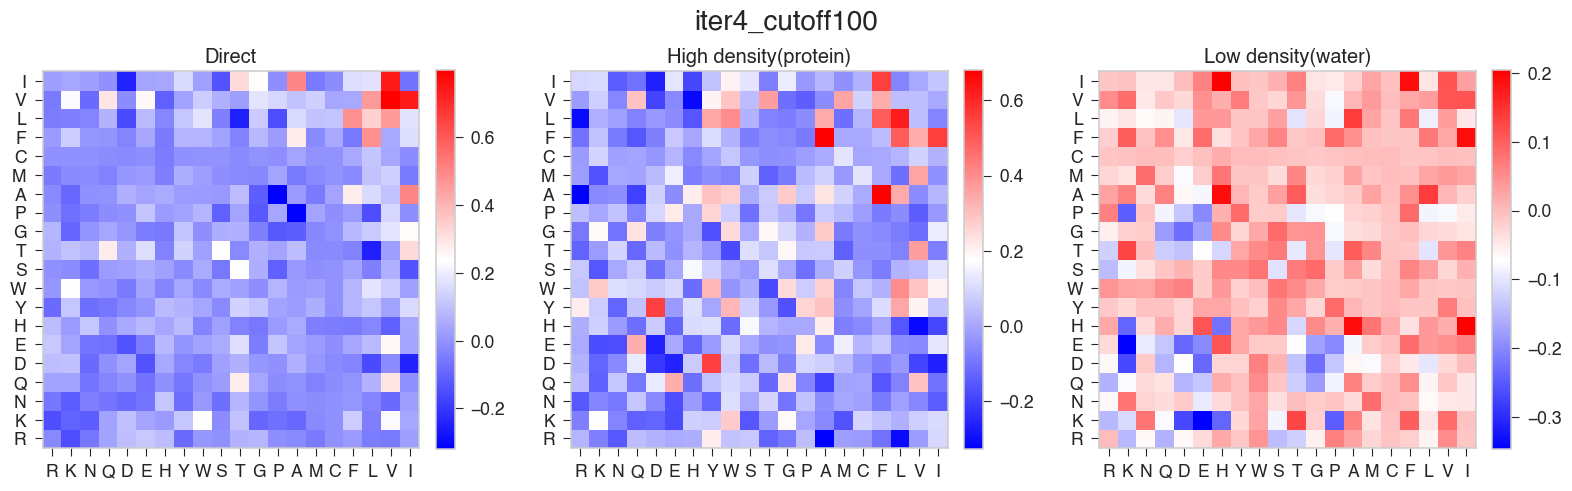

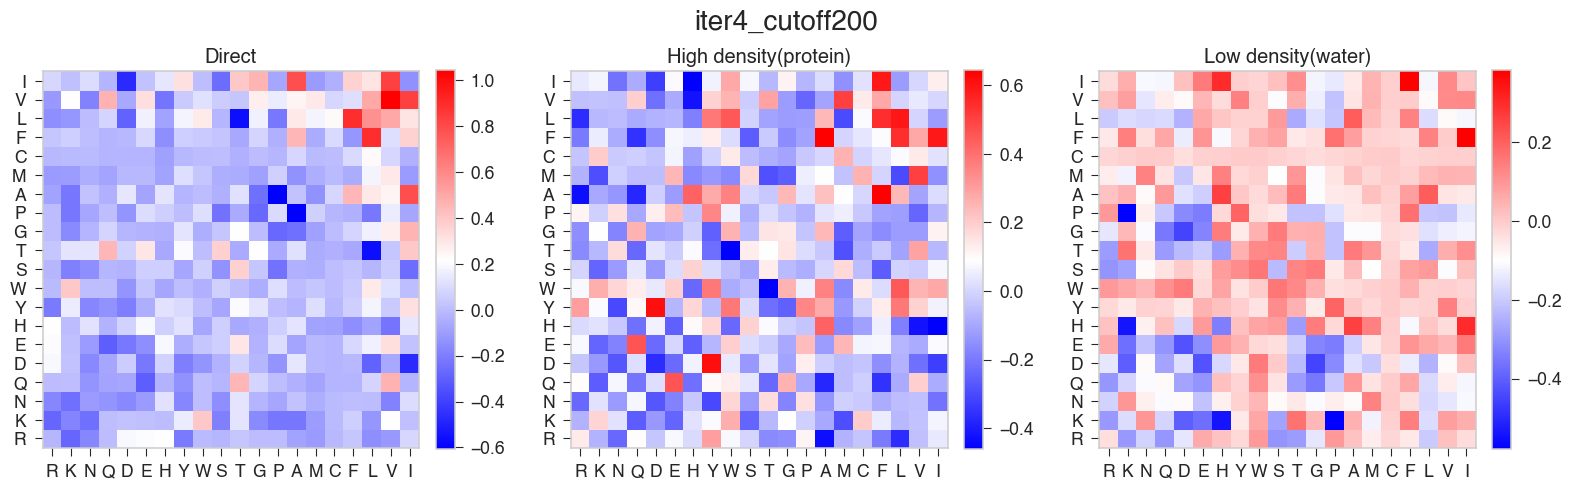

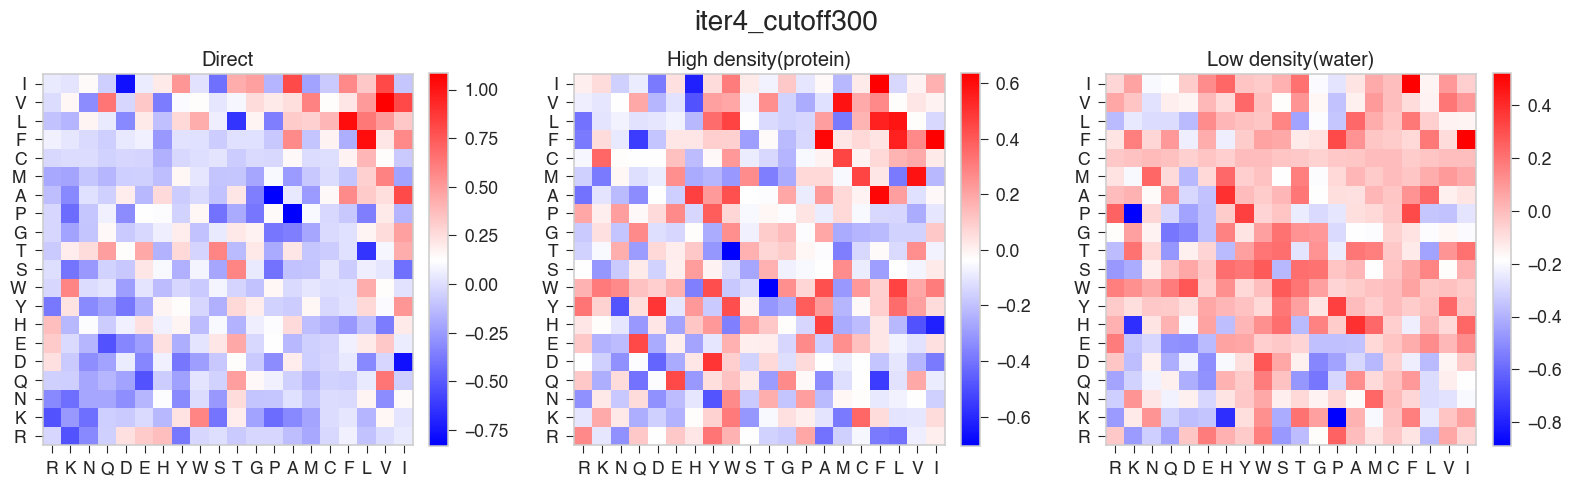

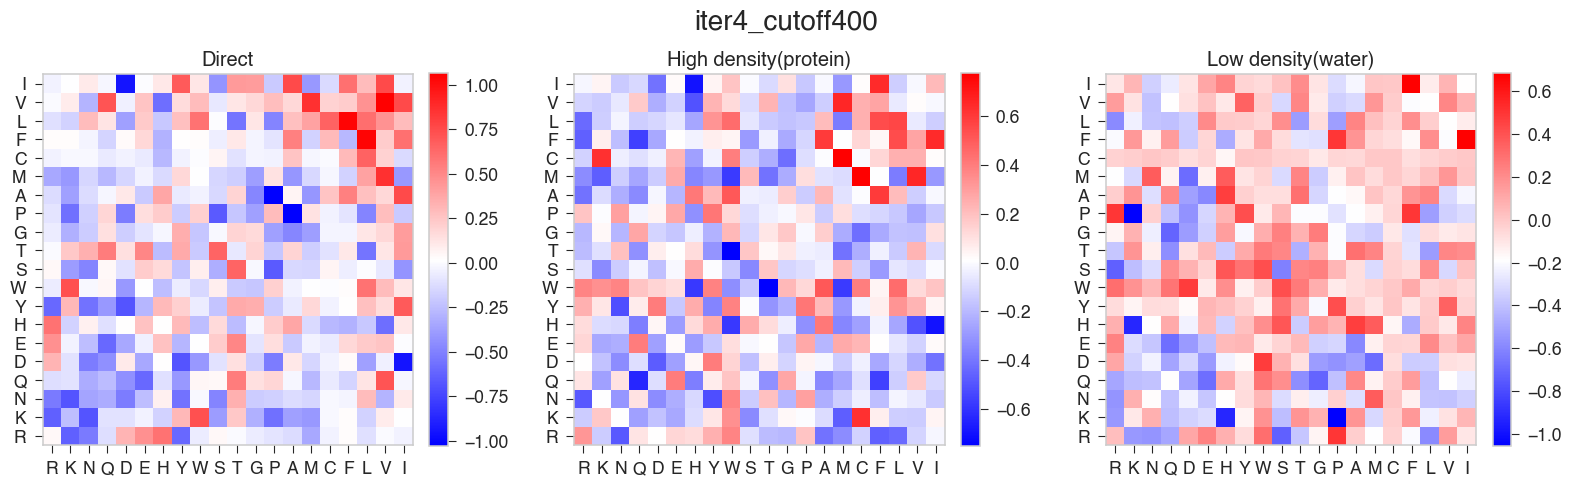

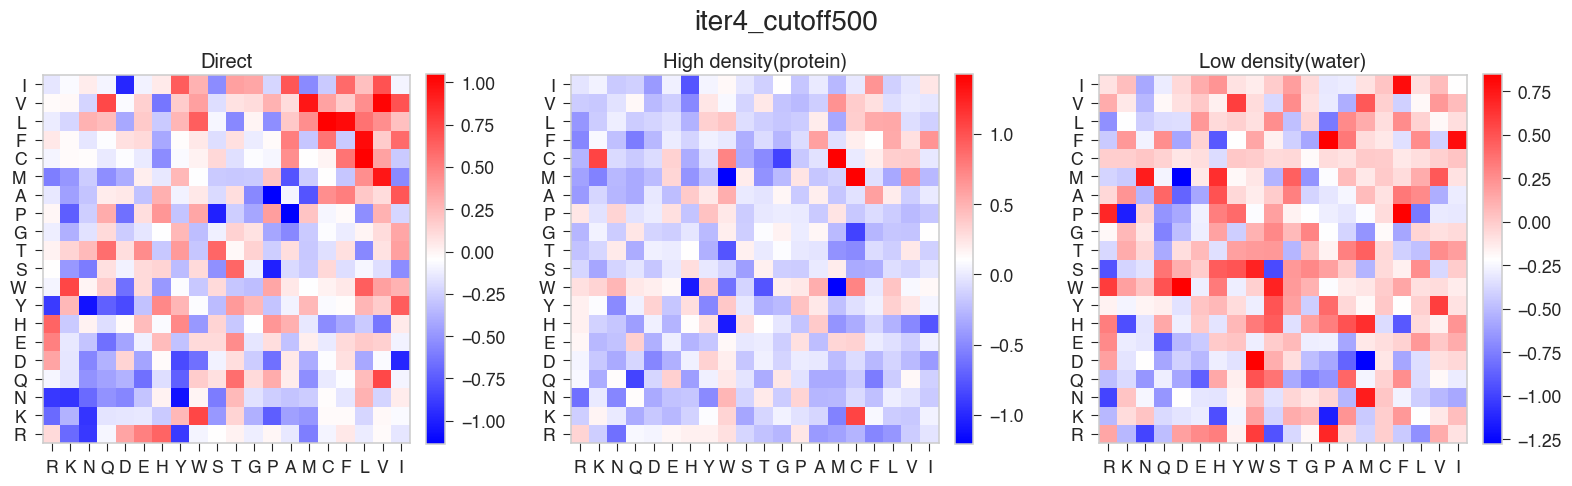

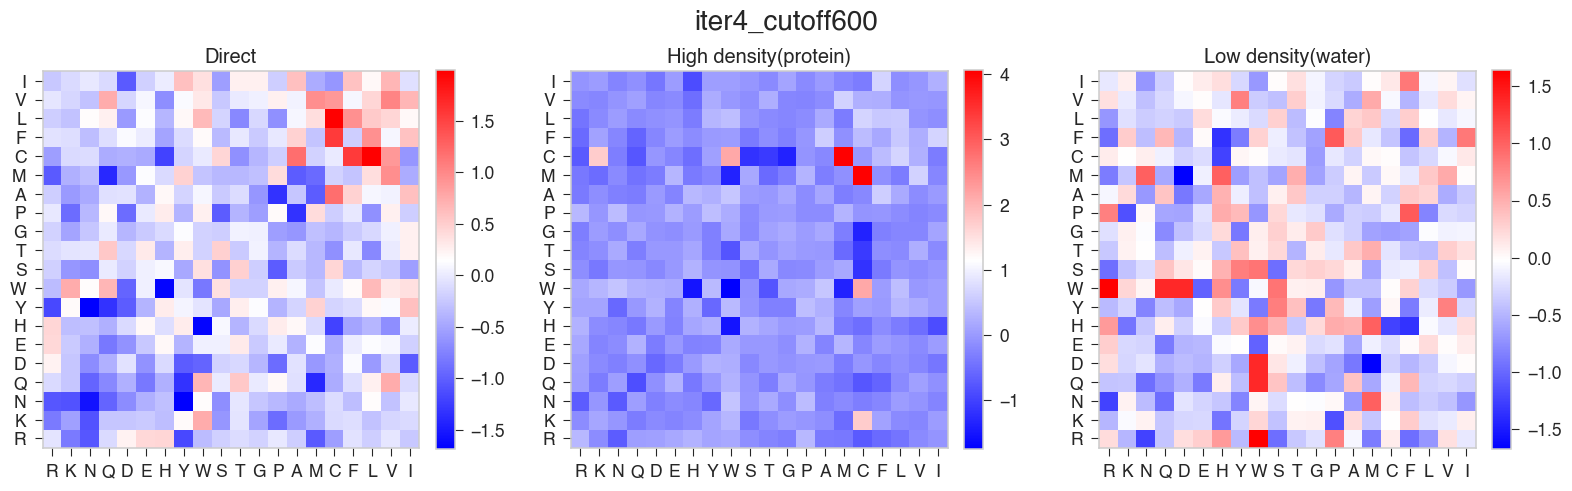

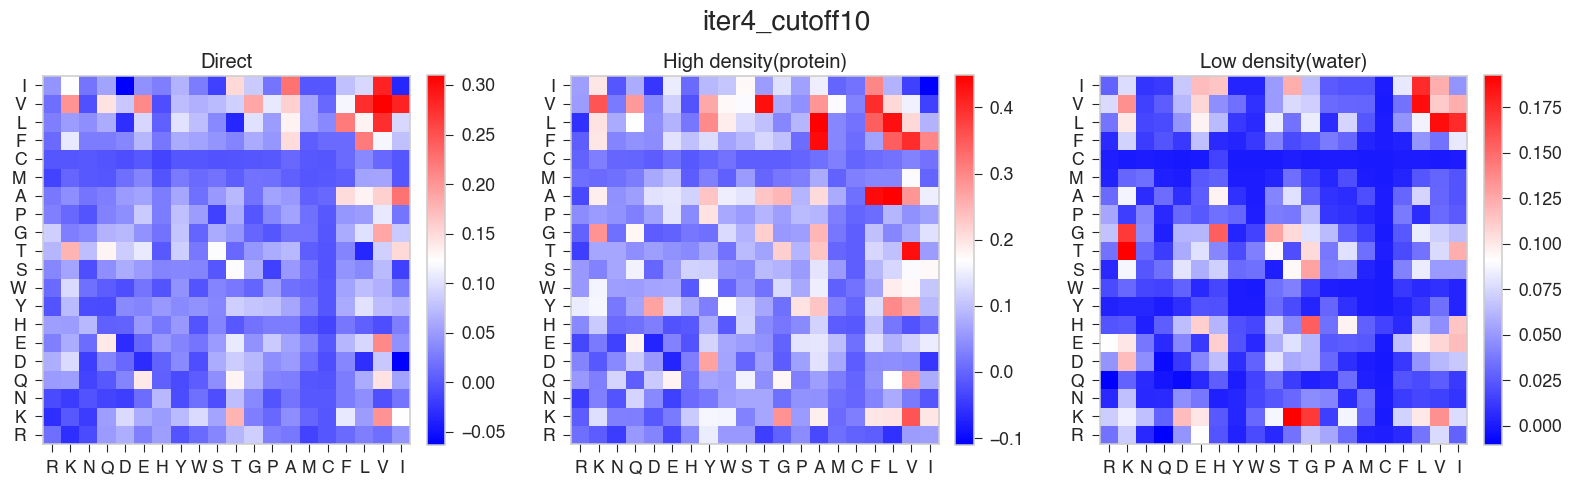

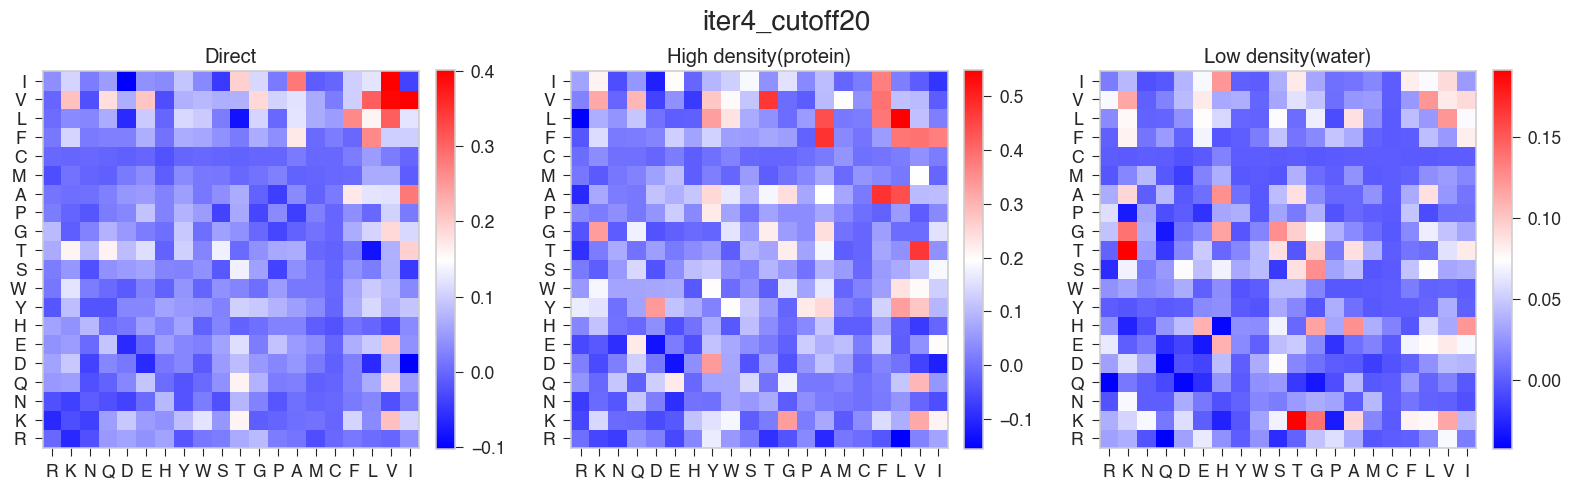

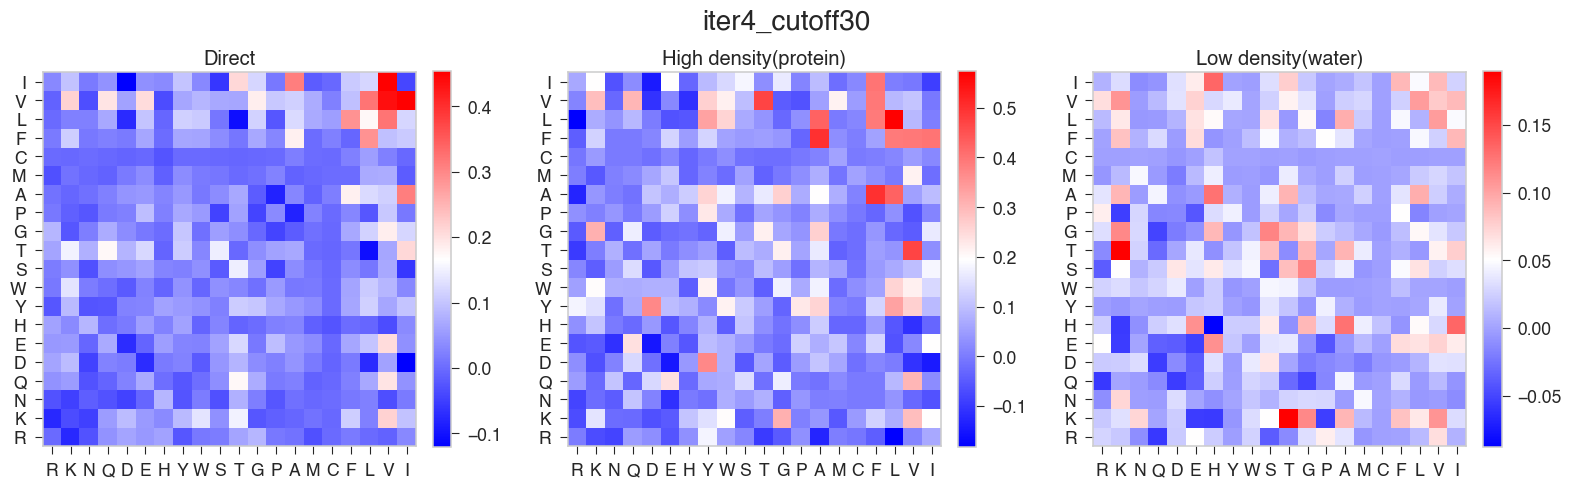

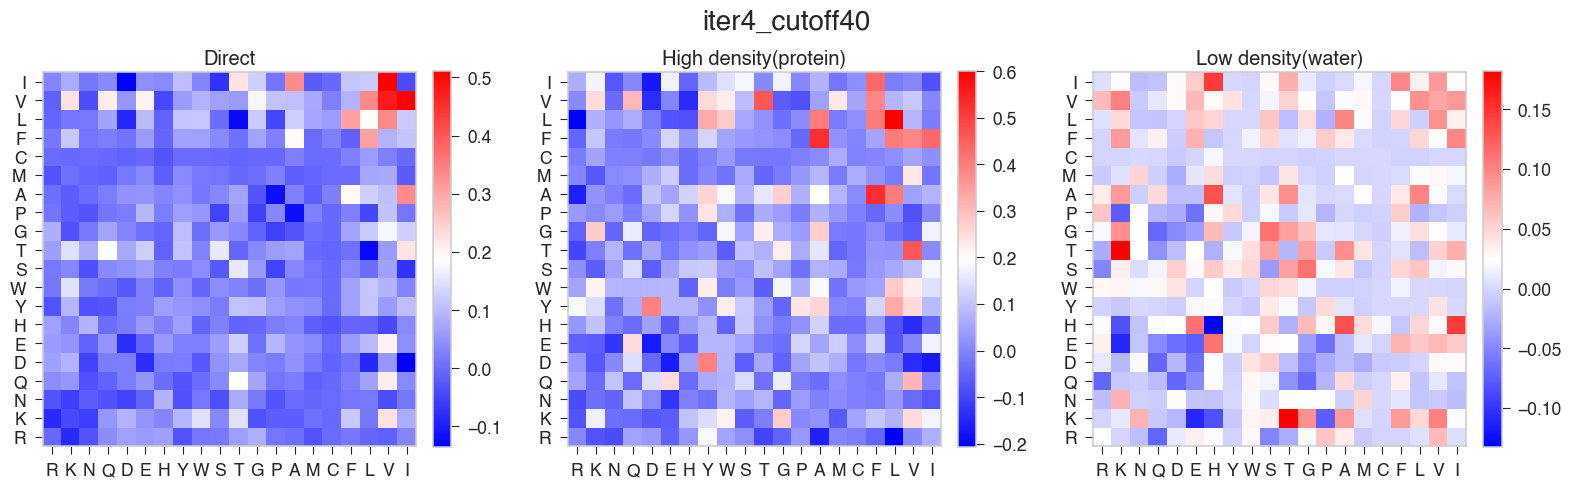

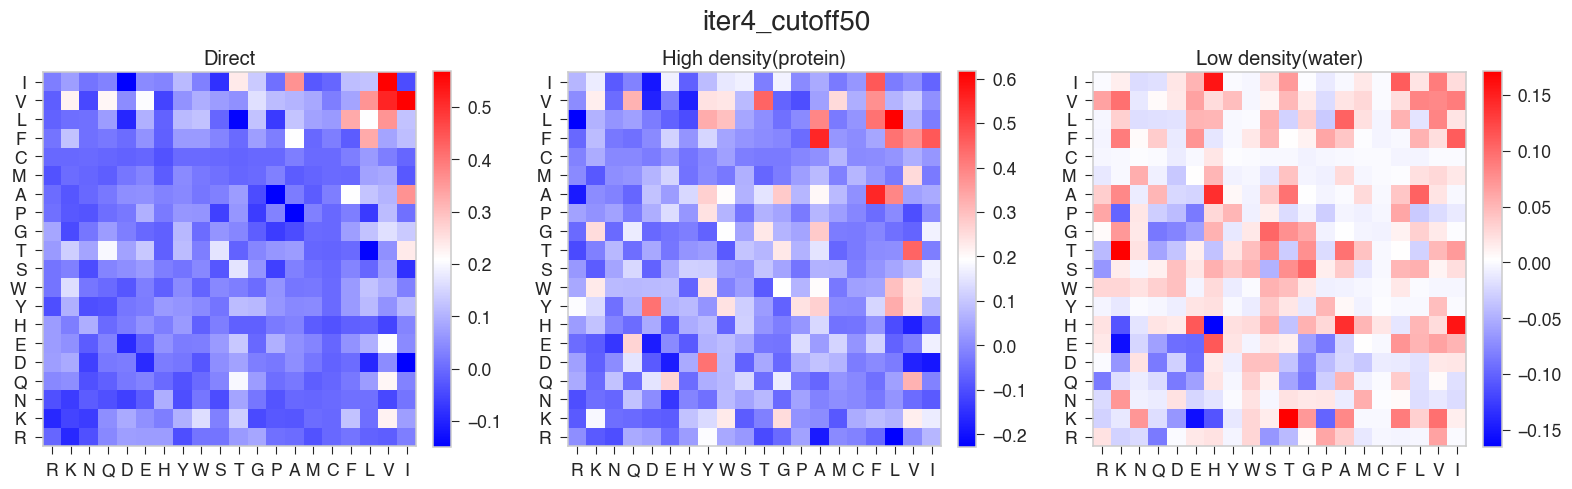

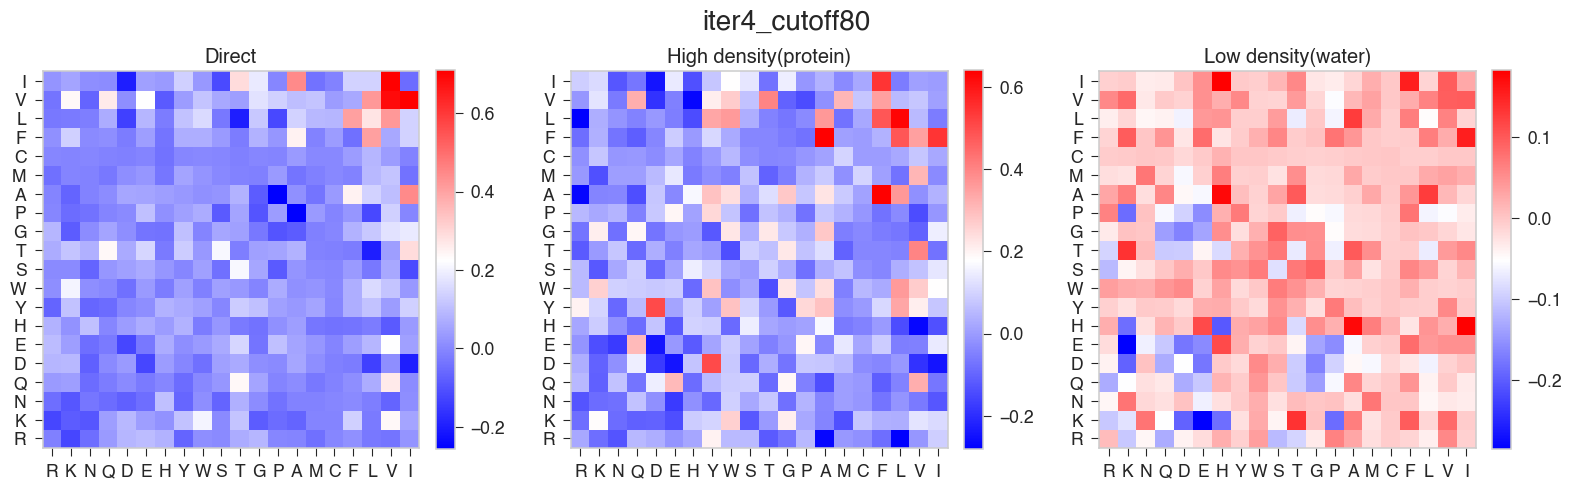

In [182]:
cutoff_list = [100, 200, 300, 400, 500, 600]
cutoff_list += [10, 20, 30, 40, 50, 80]
save_gamma_pre = "/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization_iter4/saved_gammas"
trial_name = "iter4"
os.system(f"mkdir -p {save_gamma_pre}/figures")
for cutoff_i in cutoff_list:
    # cutoff_i = 400
    name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff_i}_impose_Aprime_constraint"
    filtered_gamma = np.loadtxt(name)
    figureName = f"{save_gamma_pre}/figures/{trial_name}_cutoff{cutoff_i}"
    title = f"{trial_name}_cutoff{cutoff_i}"
    show_together(filtered_gamma, figureName, title=title)

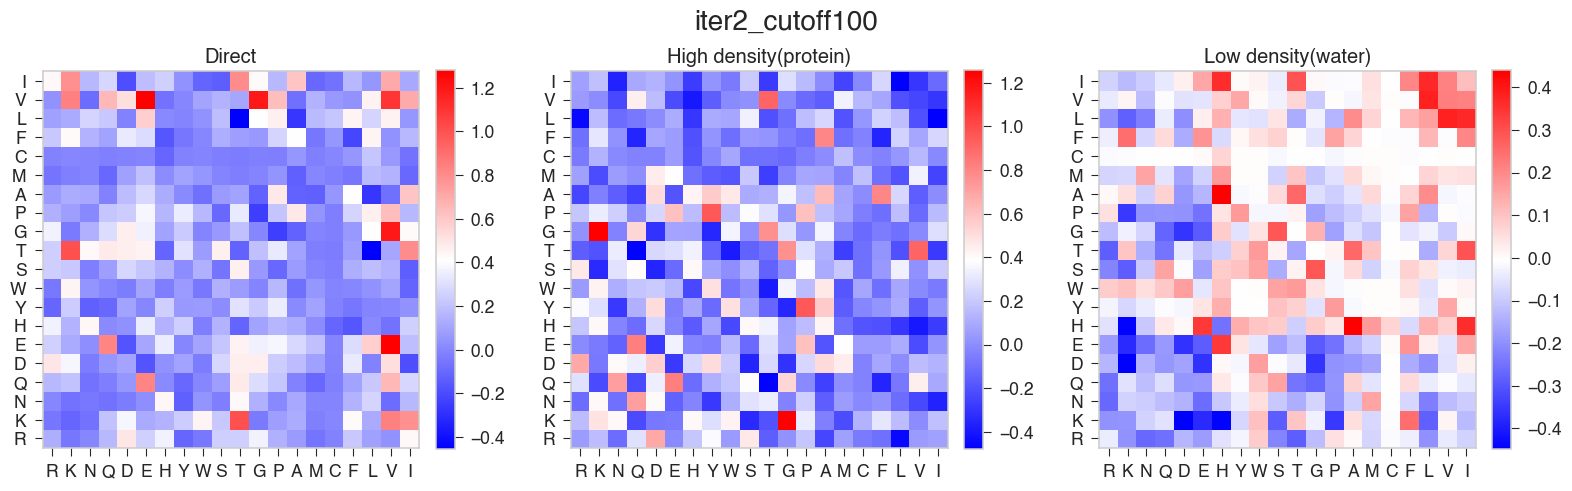

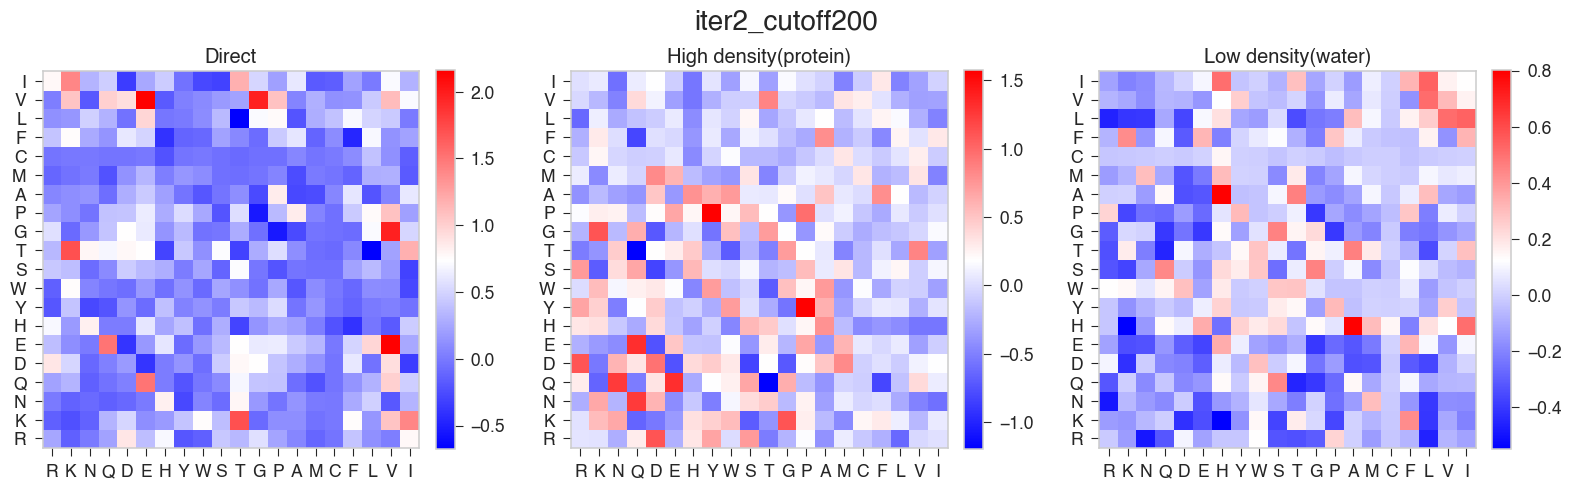

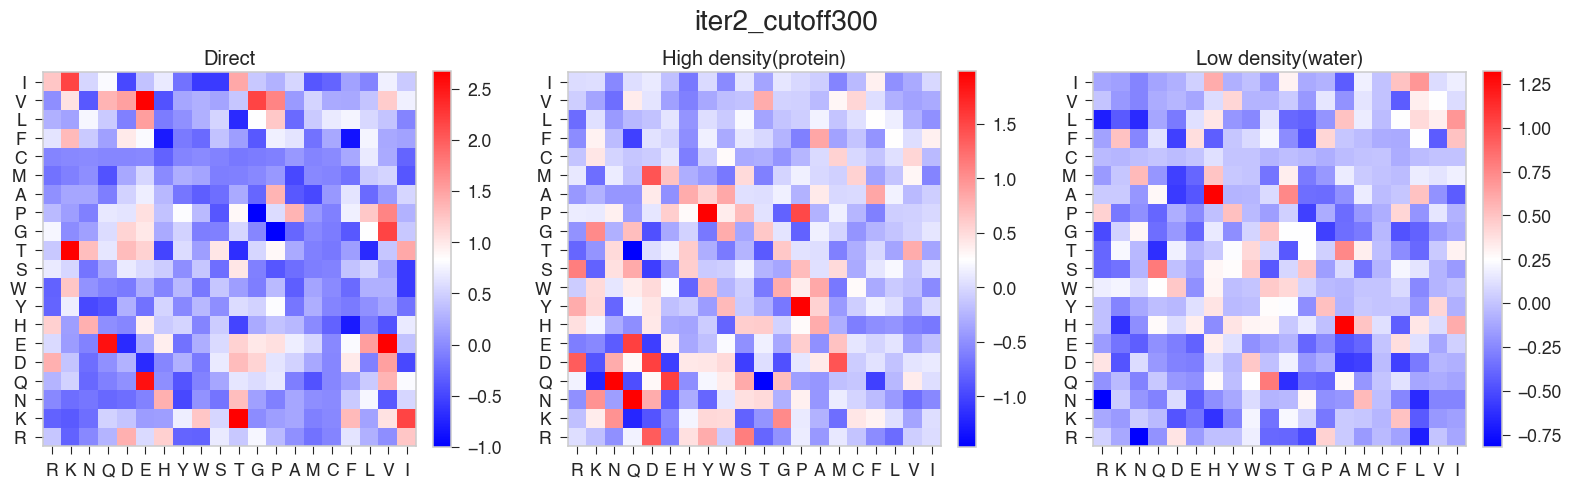

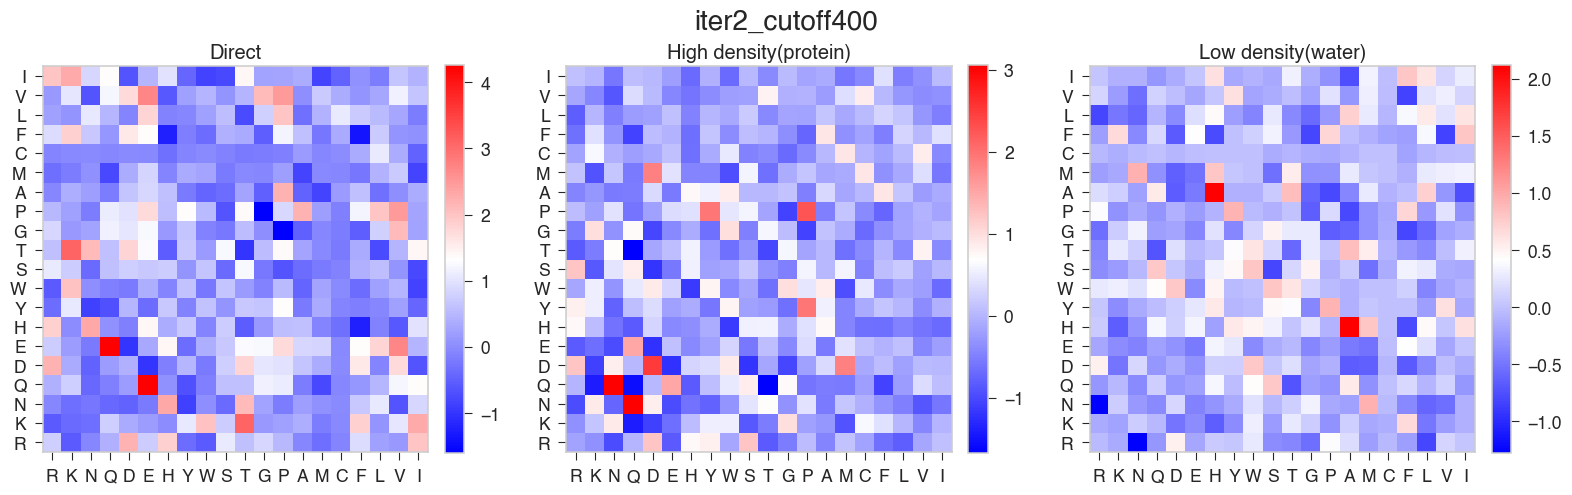

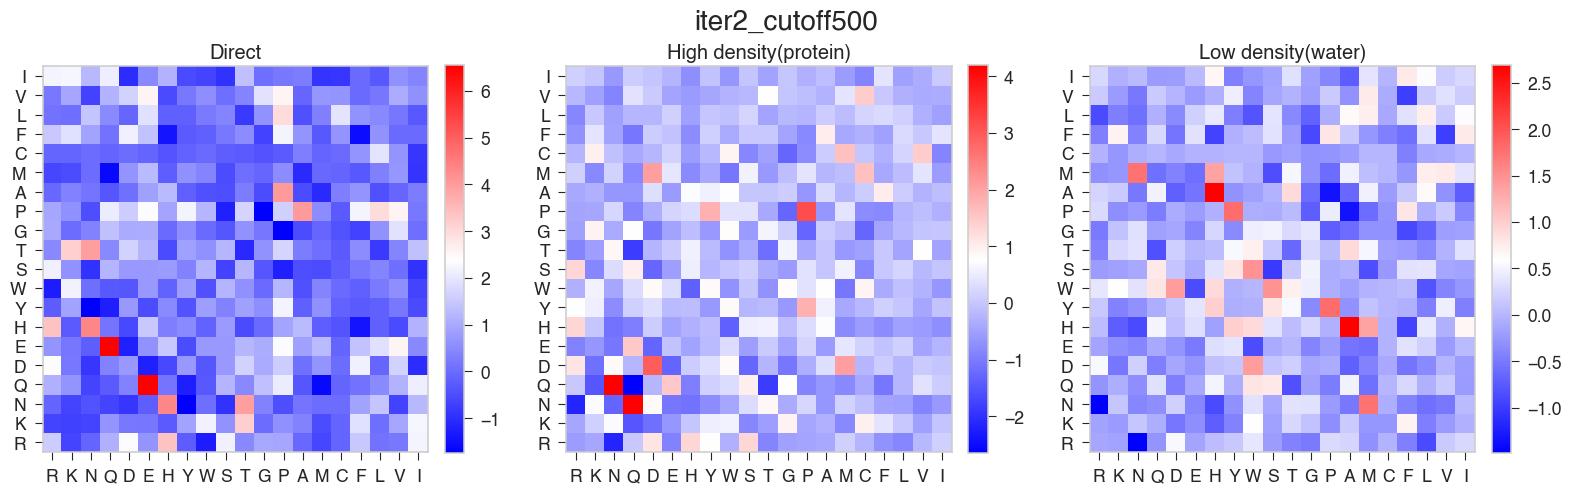

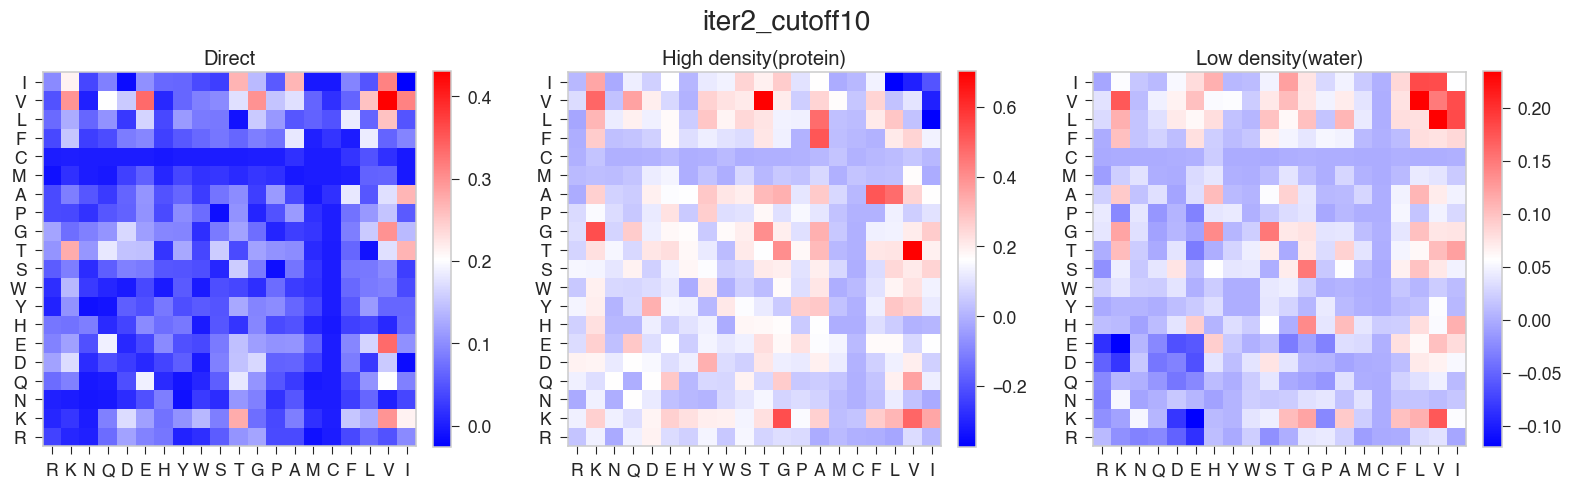

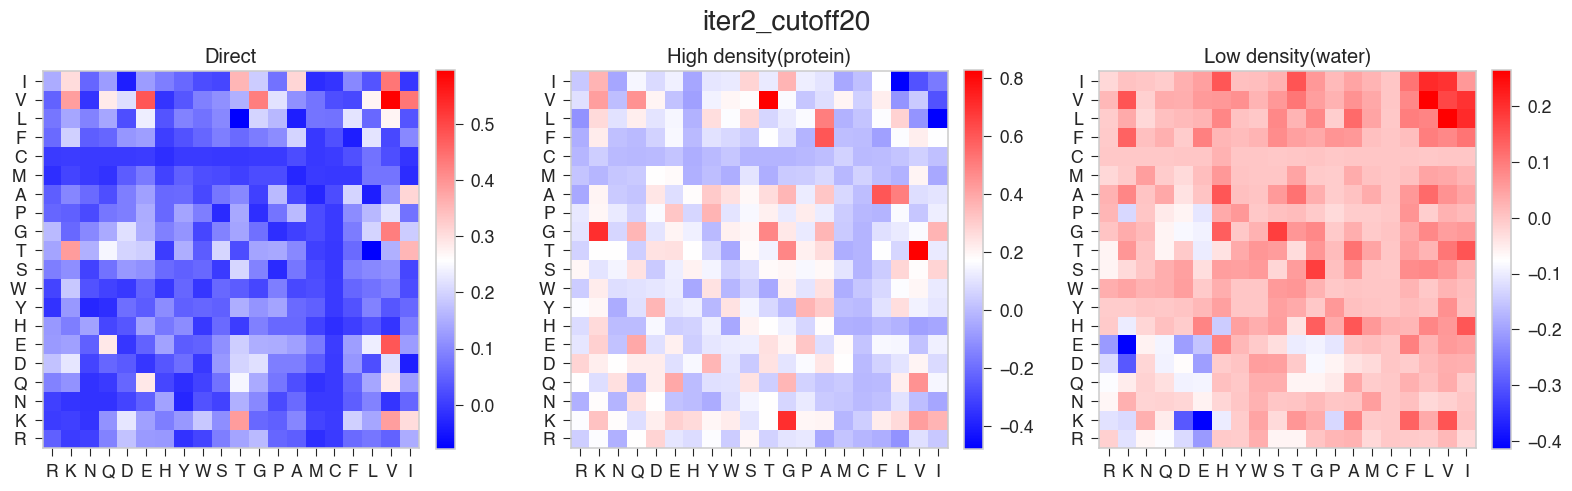

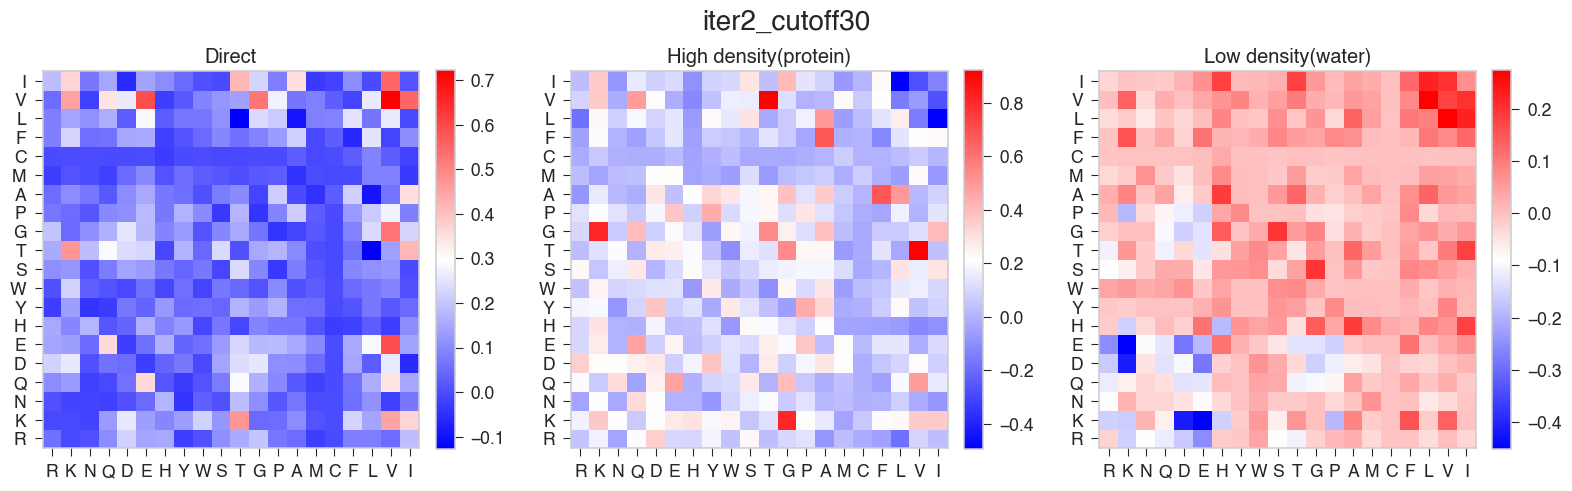

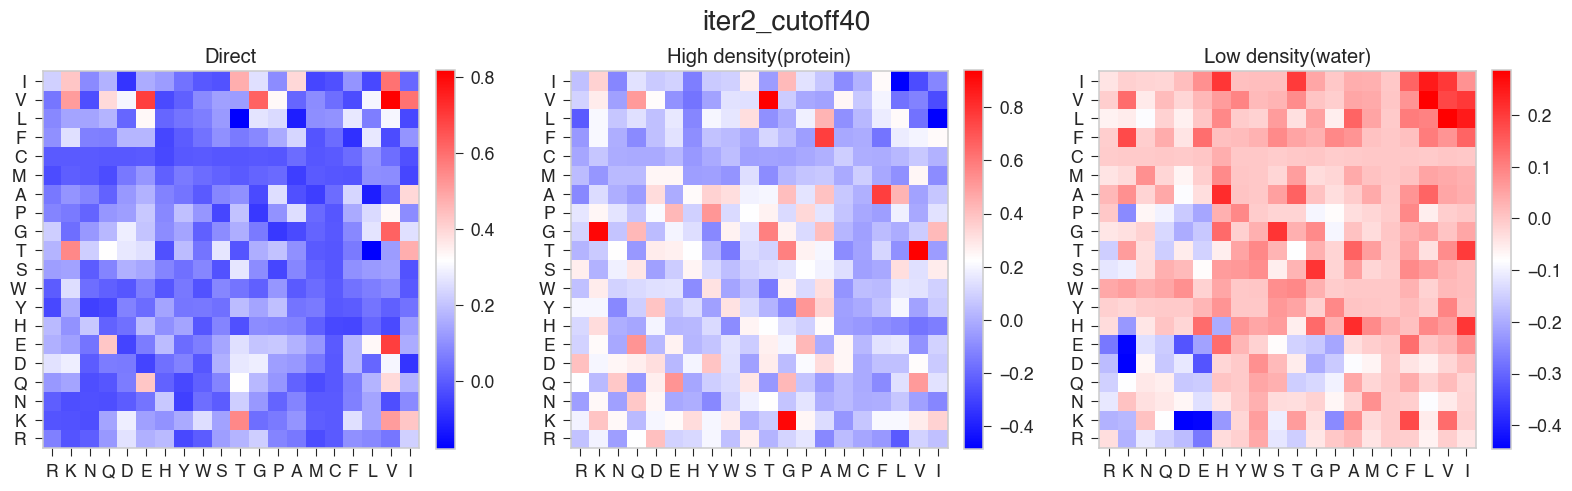

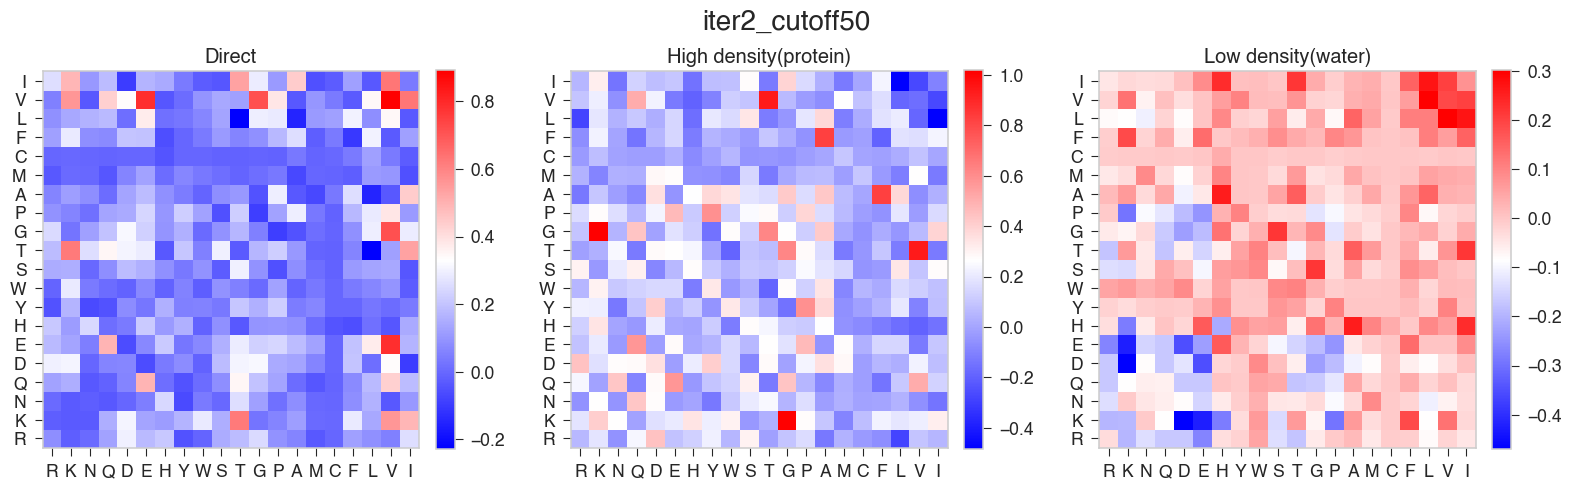

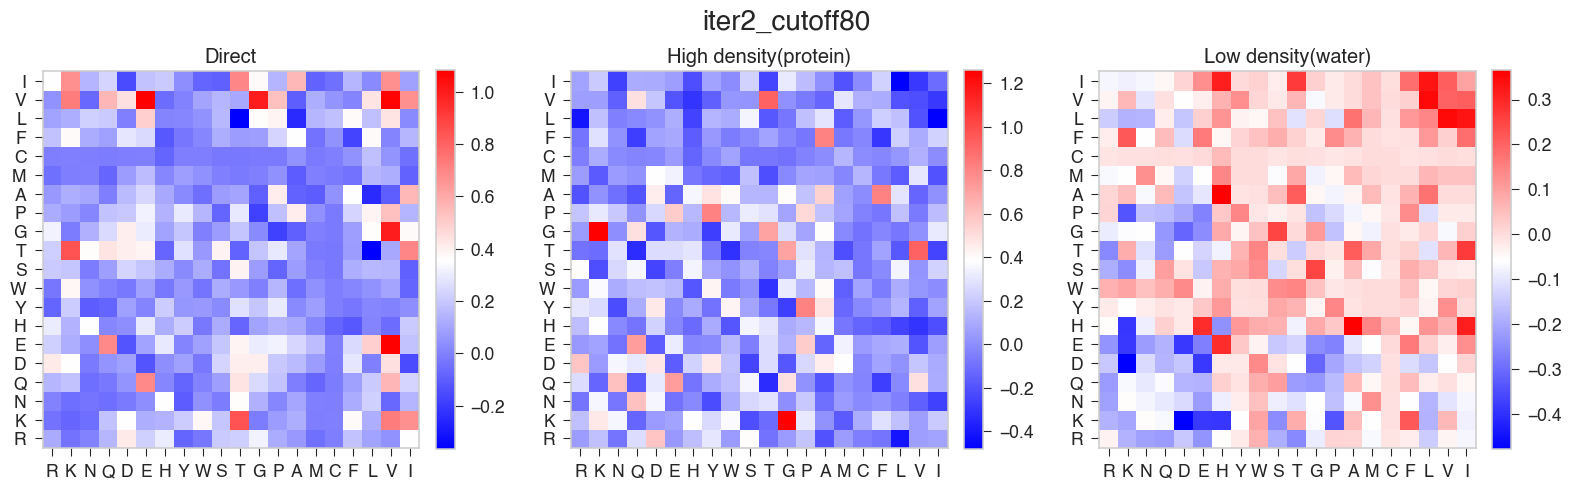

In [151]:
cutoff_list = [100, 200, 300, 400, 500]
cutoff_list += [10, 20, 30, 40, 50, 80]
os.system(f"mkdir -p {save_gamma_pre}/figures")
for cutoff_i in cutoff_list:
    # cutoff_i = 400
    name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff_i}_impose_Aprime_constraint"
    filtered_gamma = np.loadtxt(name)
    figureName = f"{save_gamma_pre}/figures/{trial_name}_cutoff{cutoff_i}"
    title = f"{trial_name}_cutoff{cutoff_i}"
    show_together(filtered_gamma, figureName, title=title)

In [4]:
# pdb list
pre = "/Users/weilu/Research/server/dec_2019/multiDensityOptimization/awsem_contact_term/"
databaseFolder = pre + "database/dompdb/"


In [13]:
pdbFolderList = glob.glob(databaseFolder+"*.pdb")
pdbNames = [a.split("/")[-1].split(".")[0] for a in pdbFolderList]

In [14]:
len(pdbNames)

1825

In [21]:
filtered_pdbNames = []
for pdb in pdbNames:
    if os.path.exists(pre+f"/database/S20_seq/{pdb}.seq"):
        filtered_pdbNames.append(pdb)
    else:
        # print(pdb)
        pass

In [22]:
os.system(f"mkdir -p {pre}/alignments")
for pdb in filtered_pdbNames:
    if os.path.exists(f"/Users/weilu/Research/optimization/mediated_term/multisequenceanddcafrustratometry/{pdb}_filtered_0.05.seqs"):
        # filtered_pdbNames.append(pdb)
        os.system(f"cp /Users/weilu/Research/optimization/mediated_term/multisequenceanddcafrustratometry/{pdb}_filtered_0.05.seqs {pre}/alignments/")
    else:
        print(pdb)
        # pass

In [23]:
with open(f"{pre}/protein_list", "w") as out:
    for pdb in filtered_pdbNames:
        out.write(pdb+"\n")

In [24]:
# information about alignments
info = []
for pdb in filtered_pdbNames:
    name = pdb
    with open(f"{pre}/alignments/{name}_filtered_0.05.seqs") as f:
        a = f.readlines()
    info.append([pdb, len(a)])

In [3]:
pre = "/Users/weilu/Research/server/dec_2019/multiDensityOptimization/awsem_contact_term/gammas/"
trial_name = "trial_1_multiseq"

In [4]:
pp = f"protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
# pp = f"protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0phi_debye_huckel_well0"


In [87]:
gamma_file_name = "/Users/weilu/opt/parameters/original_gamma"
original_gamma = np.loadtxt(gamma_file_name)
# a = list(original_gamma)
# a.append(1)
# original_gamma_deybe = np.array(a)
# we want to impose additional contraint so that A' * gamma = constnat.(-562.23)
cutoff_list = [100, 200, 300, 400, 500, 600]
cutoff_list += [10, 20, 30, 40, 50, 80]
for cutoff_i in cutoff_list:
    A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
    c = np.dot(A_prime, original_gamma)
#     c = np.dot(A_prime, original_gamma)
    B_inv = filtered_B_inv
    lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
    gamma_new = B_inv.dot(A-A_prime*lambda_2)
    # impose A'gamma
    save_gamma_pre = "/Users/weilu/Research/server/dec_2019/saved_gammas/"
    name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff_i}_impose_Aprime_constraint"
    np.savetxt(name, gamma_new)
    cmd = f"convert_to_simulation_format.py {name} {save_gamma_pre}/Dec11_{trial_name}_cutoff{cutoff_i}_impose_Aprime_constraint"
    os.system(cmd)

NameError: name 'do' is not defined

In [50]:
def plot_contact_all(gammas, ax, invert_sign=True, fix_colorbar=True, inferBound=False,
                        vmin=-0.3, vmax=0.3, fix_confidence_colorbar=True, confidence_vmin=0,
                        confidence_vmax=1.0, plot_confidence=False, confidence_lower=None, confidence_upper=None):
    size = 20
    interaction_matrix = np.zeros((size, size))
    i_content = 0
    for i in range(size):
        for j in range(i, size):
            index1 = hydrophobicity_map[inverse_res_type_map[i]]
            index2 = hydrophobicity_map[inverse_res_type_map[j]]
            interaction_matrix[index1][index2] = gammas[i_content]
            interaction_matrix[index2][index1] = gammas[i_content]
            i_content += 1

    # The minus sign is here to be consistent with the way AWSEM thinks about gammas
    if invert_sign:
        interaction_matrix *= -1

    if inferBound:
        vmin = np.min(interaction_matrix)
        vmax = np.max(interaction_matrix)

    if fix_colorbar:
        cax = ax.pcolor(interaction_matrix, vmin=vmin,
                        vmax=vmax, cmap="bwr")
    else:
        cax = ax.pcolor(interaction_matrix, cmap="RdBu_r")
    # fig.colorbar(cax)
    plt.colorbar(cax,fraction=0.046, pad=0.04)
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(interaction_matrix.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(interaction_matrix.shape[1]) + 0.5, minor=False)

    ax.set_xticklabels(hydrophobicity_letters)
    ax.set_yticklabels(hydrophobicity_letters)

    # plt.savefig('direct_contact.pdf')
    # plt.show()


In [83]:
def show_together(filtered_gamma, figureName, title="test"):
    fig = plt.figure()
    ax1=plt.subplot(1, 3, 1)
    ax1.set_aspect('equal')
    plot_contact_all(filtered_gamma[:210], ax1, inferBound=True)
    ax2=plt.subplot(1, 3, 2)
    ax2.set_aspect('equal')
    plot_contact_all(filtered_gamma[210:420], ax2, inferBound=True)
    ax3=plt.subplot(1, 3, 3)
    ax3.set_aspect('equal')
    plot_contact_all(filtered_gamma[420:], ax3, inferBound=True)
    ax1.title.set_text('Direct')
    ax2.title.set_text('High density(protein)')
    ax3.title.set_text('Low density(water)')
    fig.suptitle(title, fontsize=20, y=0.75)
    fig.tight_layout()
    plt.savefig(figureName)

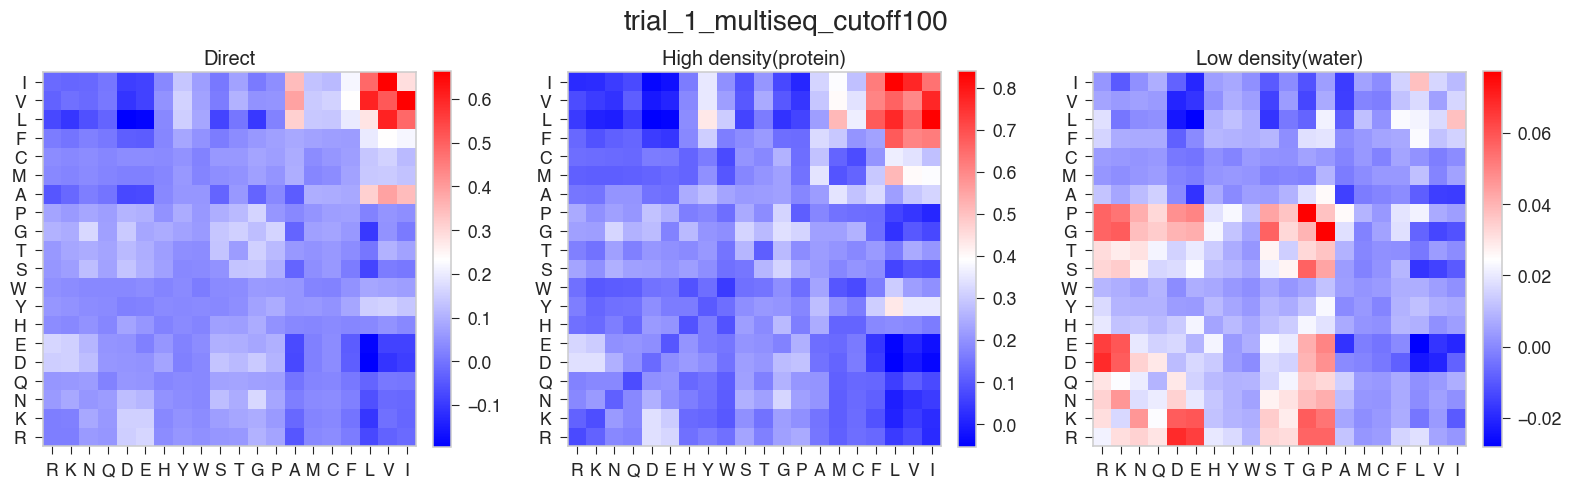

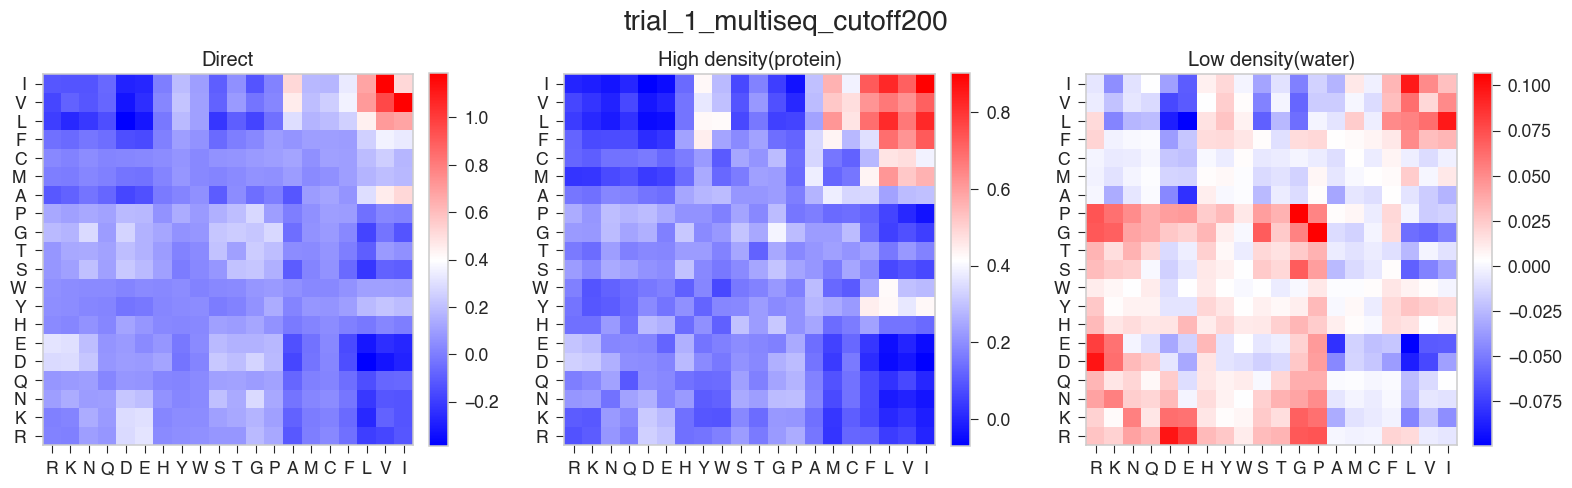

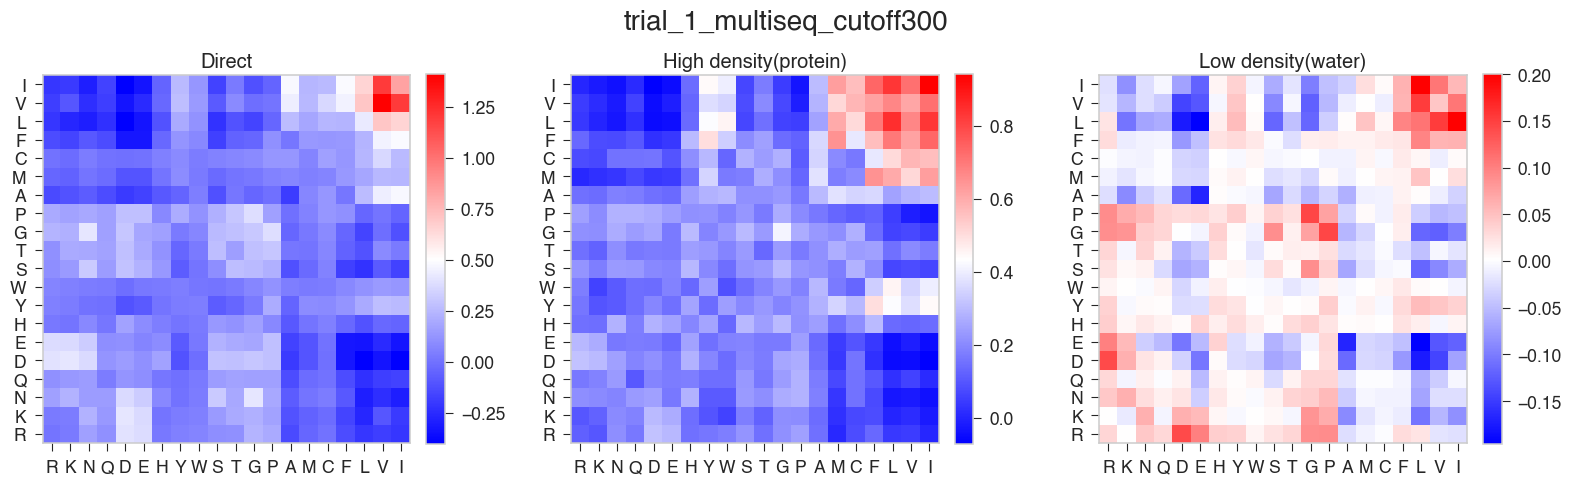

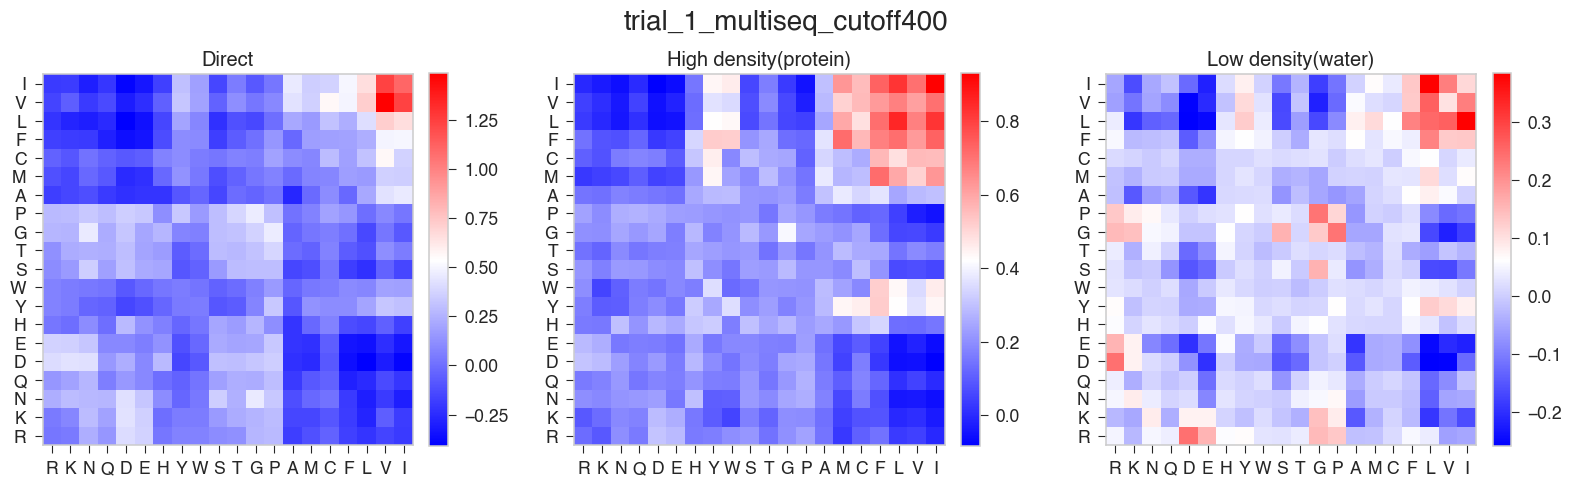

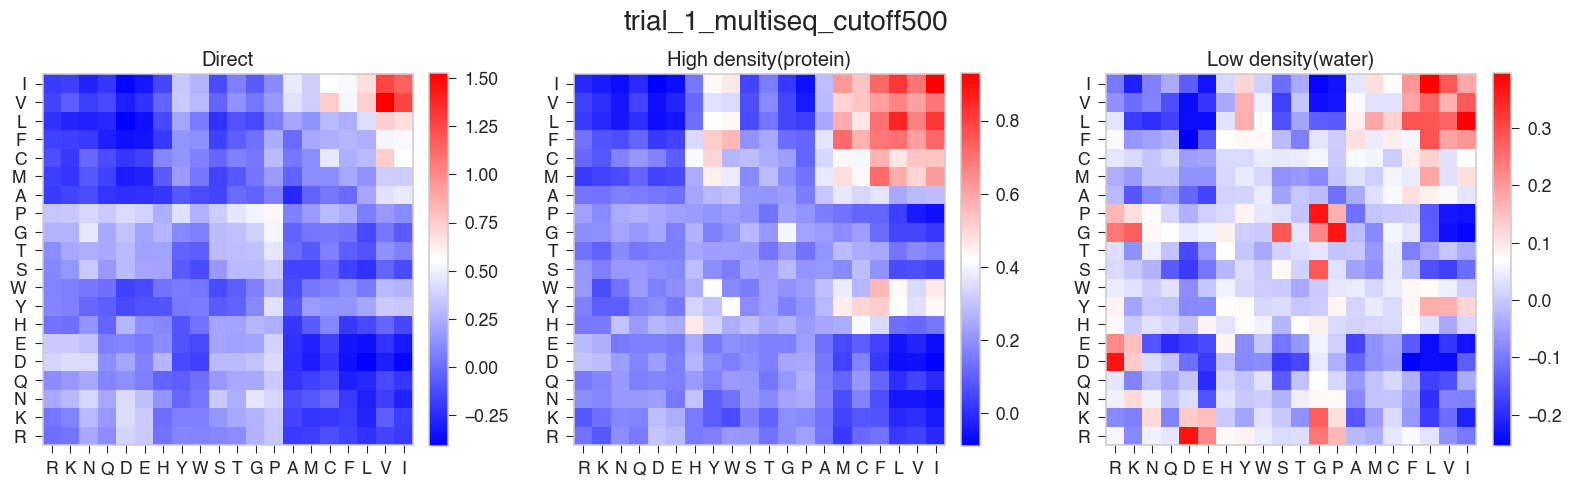

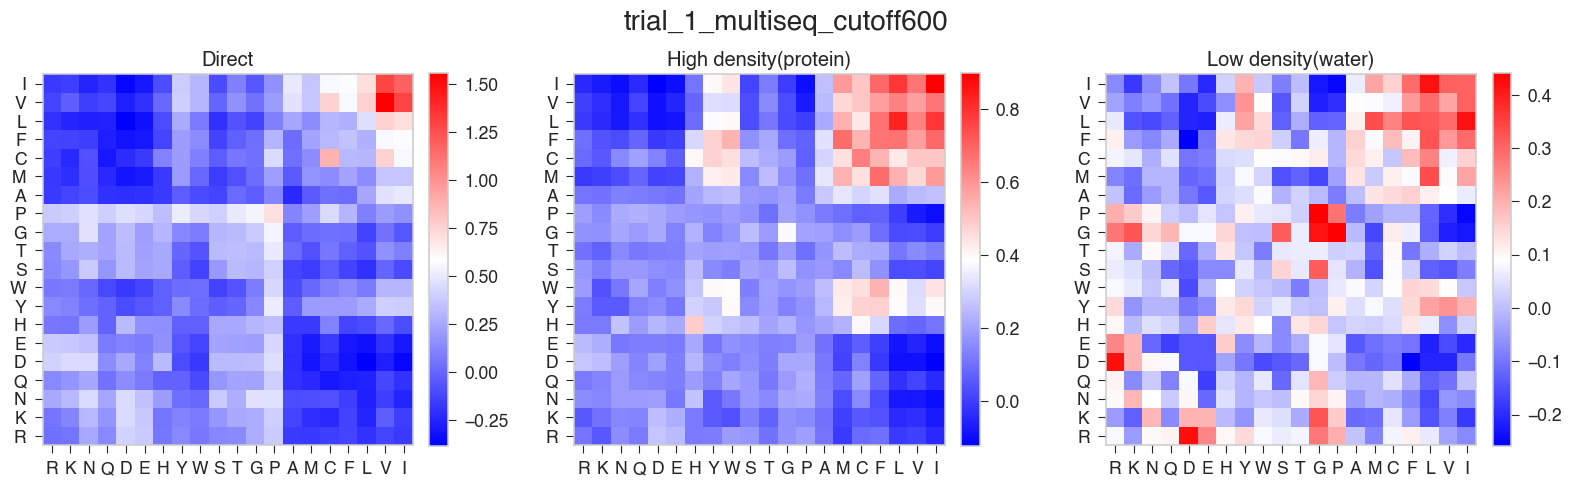

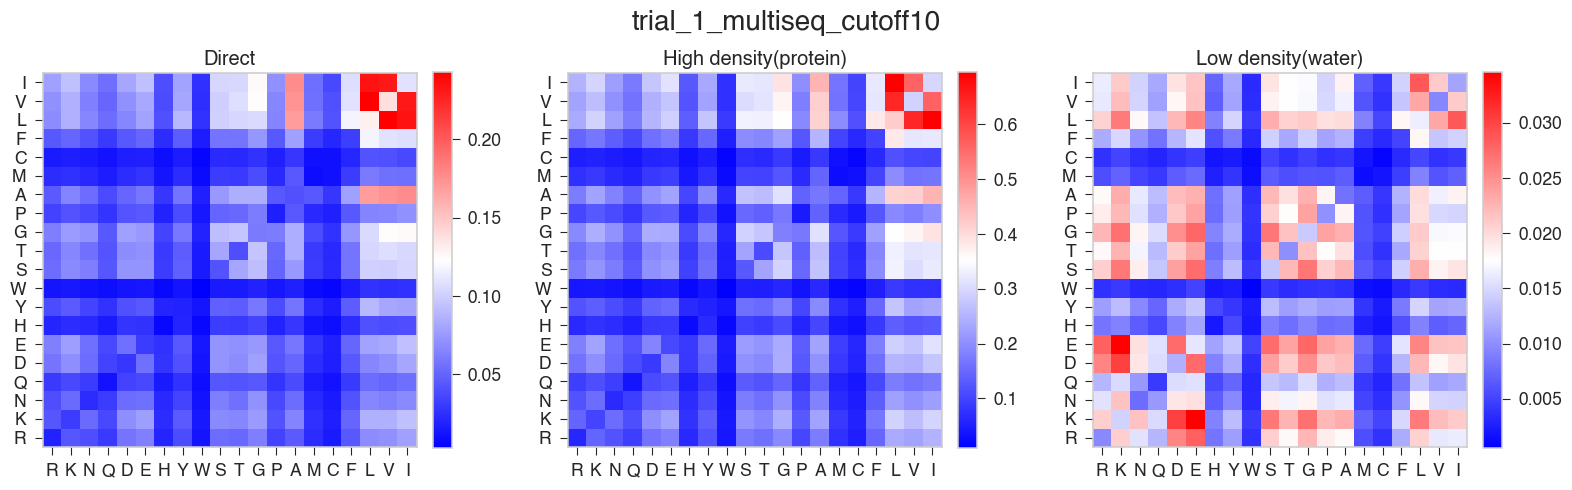

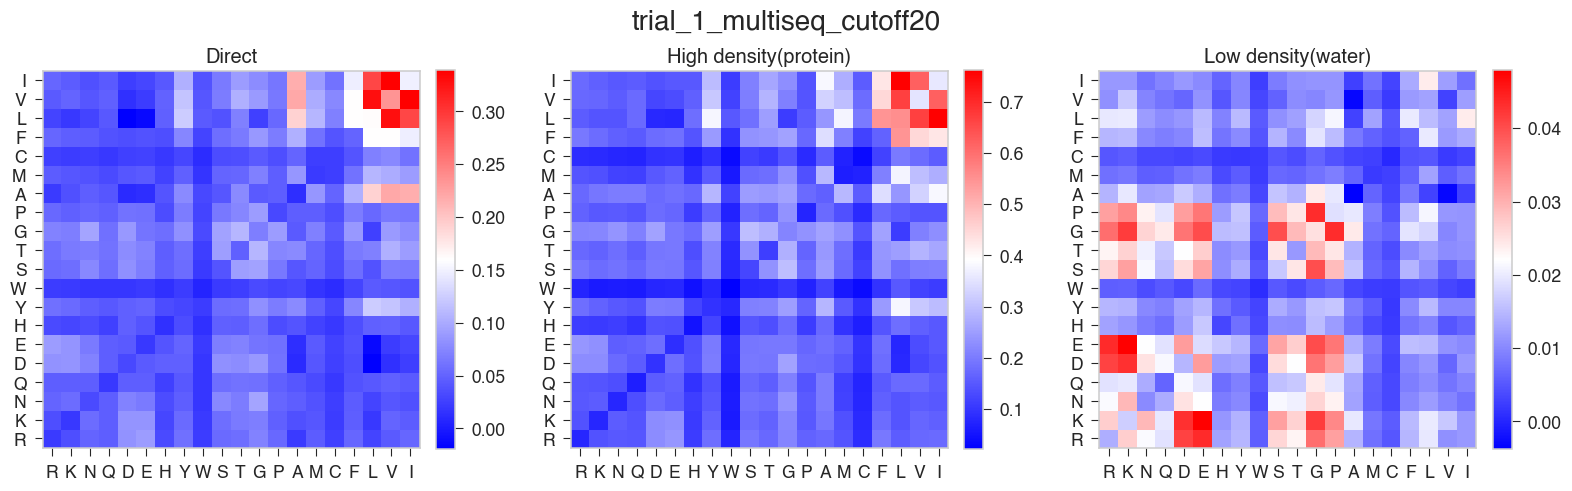

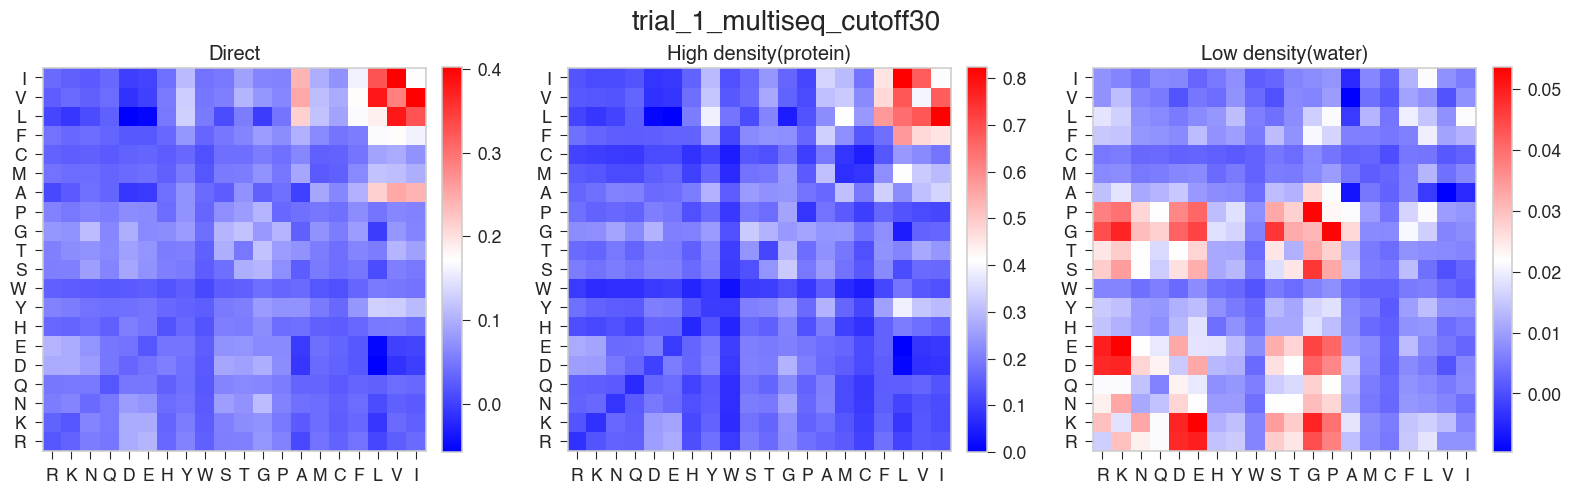

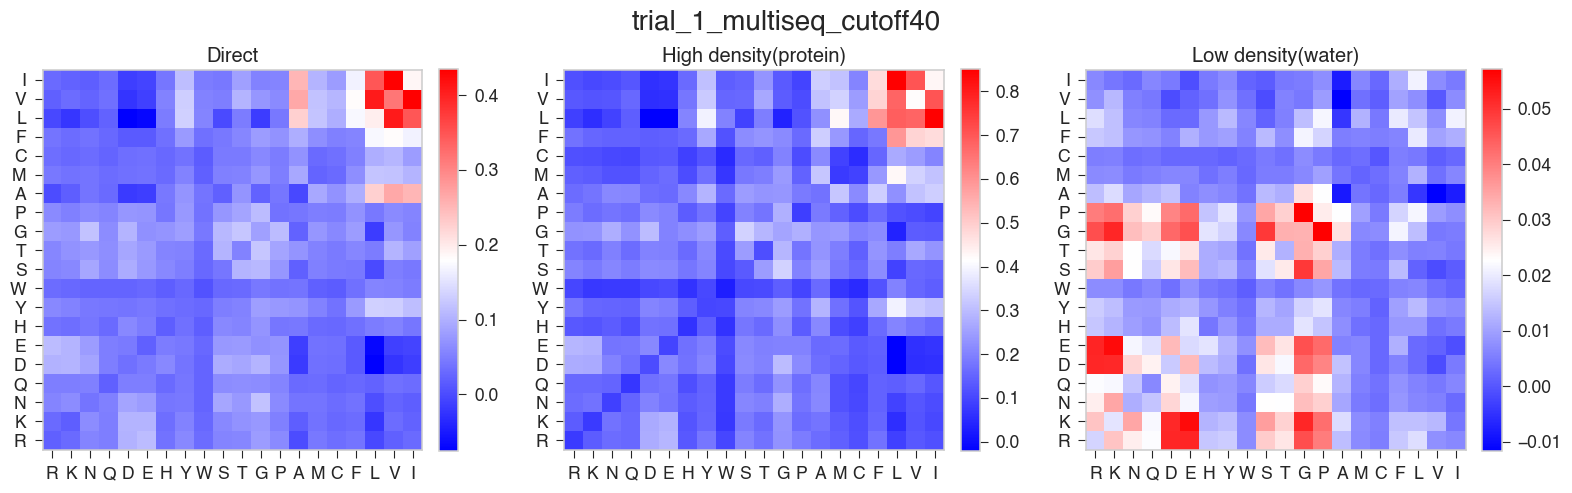

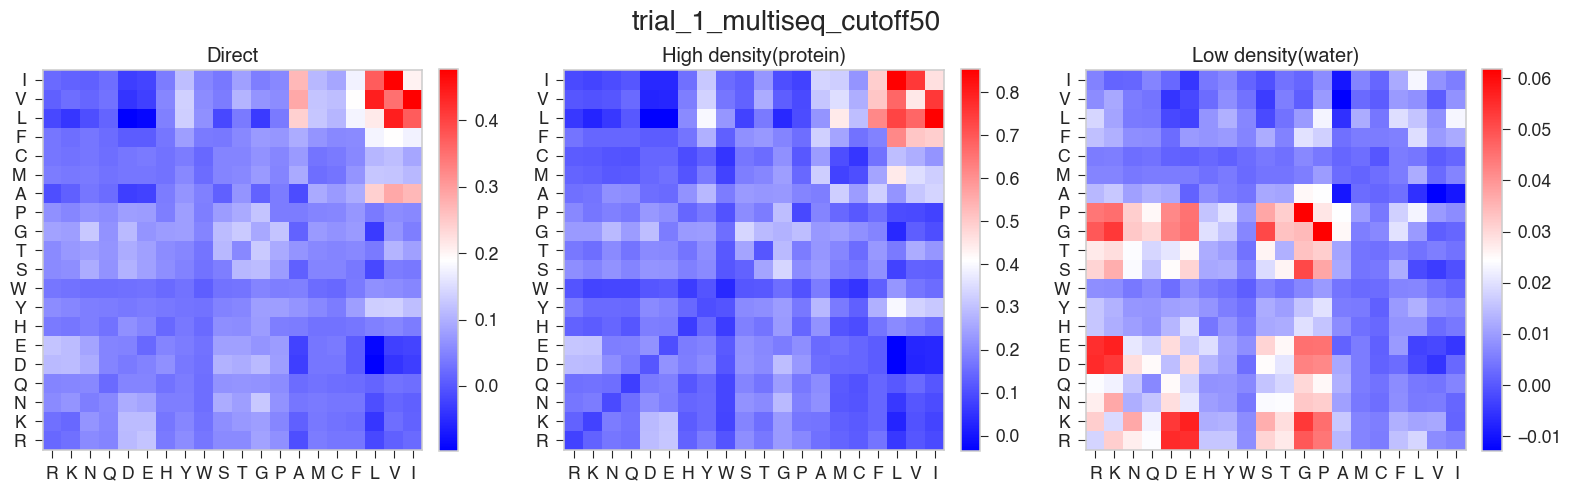

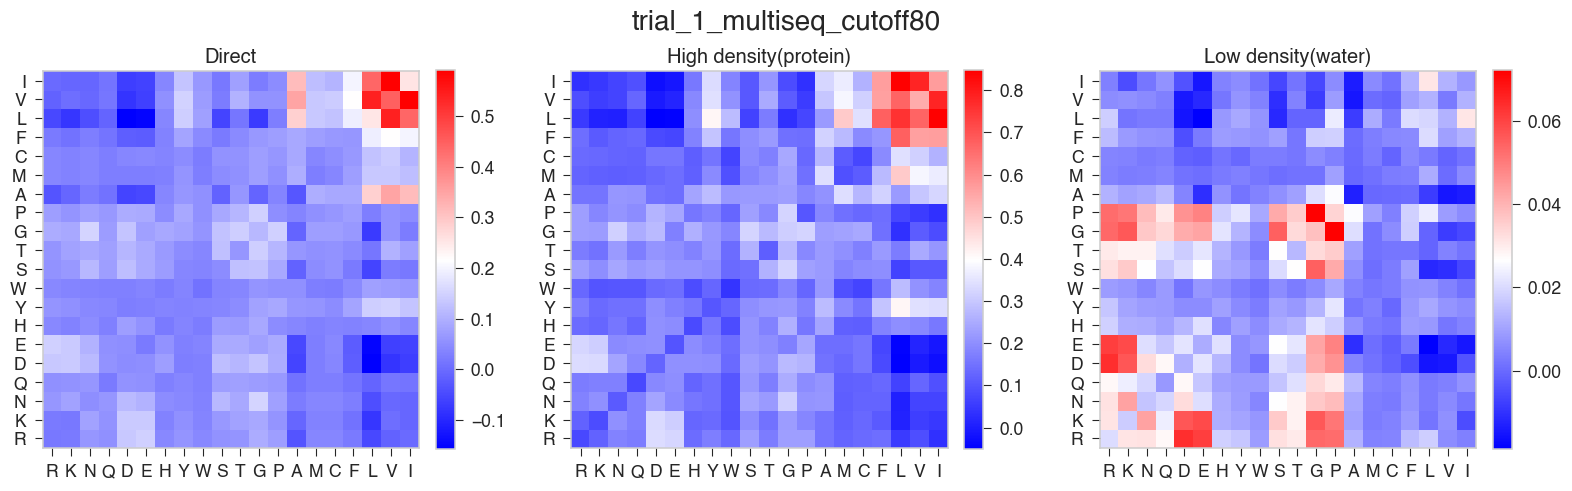

In [88]:
cutoff_list = [100, 200, 300, 400, 500, 600]
cutoff_list += [10, 20, 30, 40, 50, 80]
for cutoff_i in cutoff_list:
    # cutoff_i = 400
    name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff_i}_impose_Aprime_constraint"
    filtered_gamma = np.loadtxt(name)
    figureName = f"/Users/weilu/Research/server/dec_2019/saved_gammas/figures/{trial_name}_cutoff{cutoff_i}"
    title = f"{trial_name}_cutoff{cutoff_i}"
    show_together(filtered_gamma, figureName, title=title)

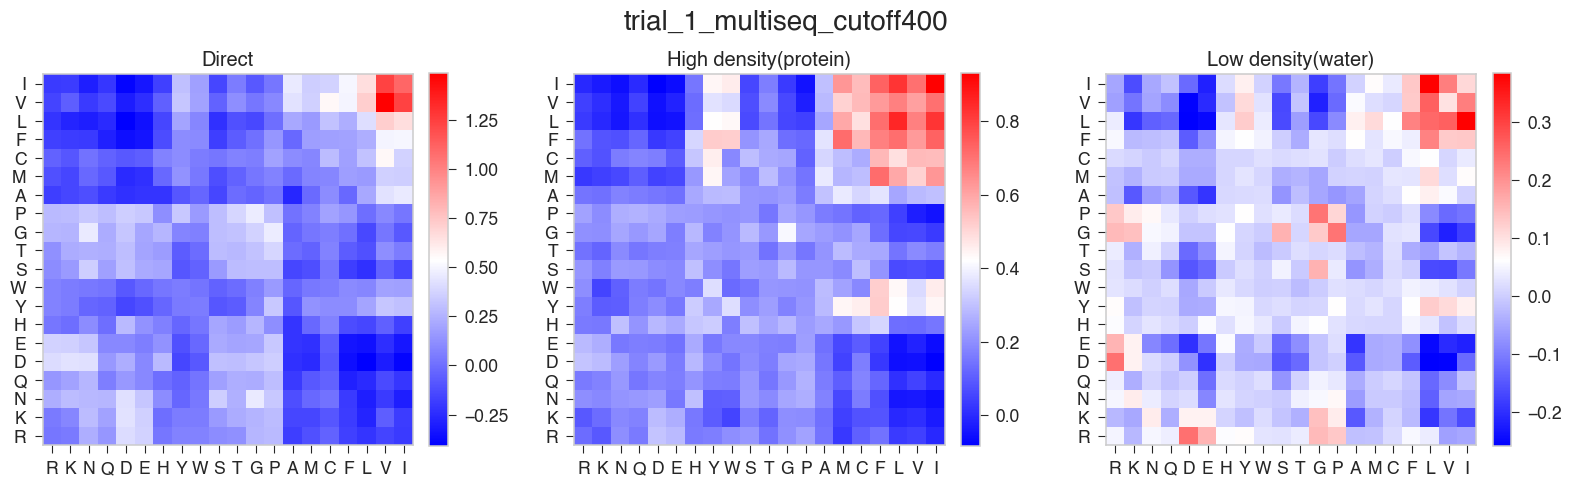

In [80]:
# fig, ax = plt.subplots(nrows=3, ncols=1)
cutoff_i = 400
name = f"{save_gamma_pre}/{trial_name}_cutoff{cutoff_i}_impose_Aprime_constraint"
filtered_gamma = np.loadtxt(name)

fig = plt.figure()
ax1=plt.subplot(1, 3, 1)
ax1.set_aspect('equal')
plot_contact_all(filtered_gamma[:210], ax1, inferBound=True)
ax2=plt.subplot(1, 3, 2)
ax2.set_aspect('equal')
plot_contact_all(filtered_gamma[210:420], ax2, inferBound=True)
ax3=plt.subplot(1, 3, 3)
ax3.set_aspect('equal')
plot_contact_all(filtered_gamma[420:], ax3, inferBound=True)
ax1.title.set_text('Direct')
ax2.title.set_text('High density(protein)')
ax3.title.set_text('Low density(water)')
fig.suptitle(f"{trial_name}_cutoff{cutoff_i}", fontsize=20, y=0.75)
fig.tight_layout()
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# fig.subplots_adjust(top=0.98)
# plt.savefig(f"/Users/weilu/Research/server/dec_2019/saved_gammas/figures/{trial_name}_cutoff{cutoff_i}")

In [202]:
a = pd.read_csv("/Users/weilu/Research/server/dec_2019/iterative_optimization/original_pdbs/Final_2Sm.csv")

In [203]:
a = a.query("Class == 'α'")

In [204]:
pdb_list = []
for pdb in a.PDB.unique():
    pdb = str(pdb)
    if "(" in pdb:
        pass
    elif pdb == "nan":
        pass
    else:
        pdb_list.append(pdb)

In [205]:
len(pdb_list)

12

In [206]:
second_test_test = a.query("PDB in @pdb_list").reset_index(drop=True).iloc[:, :23]

In [207]:
second_test_test.to_csv("/Users/weilu/Research/server/dec_2019/iterative_optimization/original_pdbs/second_test_set.csv")

In [208]:
second_test_test.PDB.str.lower().to_list()

['1ba5',
 '1fex',
 '1idy',
 '1imq',
 '1ryk',
 '1st7',
 '1w4e',
 '1w4j',
 '1yyj',
 '2a3d',
 '2wxc',
 '2wqg']

In [ ]:
# randomly select 20 out
randomly_selected = random.sample(pdb_list, 20)

In [128]:
first_test_test = a.query("PDB in @randomly_selected").reset_index(drop=True).iloc[:, :23]

In [129]:
first_test_test.to_csv("/Users/weilu/Research/server/dec_2019/iterative_optimization/original_pdbs/first_test_set.csv")

In [137]:
d = pd.read_csv("/Users/weilu/Research/server/dec_2019/iterative_optimization/original_pdbs/first_test_set.csv", index_col=0)

In [142]:
d.PDB.str.lower().to_list()

['1fex',
 '1st7',
 '1w4e',
 '2wqg',
 '1d6o',
 '1e0g',
 '1hdn',
 '1j5u',
 '1n88',
 '2ga5',
 '1c8c',
 '1k0s',
 '1g6p',
 '1e0m',
 '1hcd',
 '1jo8',
 '1mjc',
 '2jmc',
 '3o4d',
 '2l6r']

In [111]:
len(randomly_selected)

20

In [139]:
len(a)

180

In [145]:
d.sort_values("Lpdb")

,No.,Protein short name,PDB,Class,Fold,Lpdb,L,pH,Temp (°C),Folding type,...,ln(ku),ln(ku) (25°C),Unnamed: 15,βT,pH.1,Temp (°C).1,Folding type.1,ln(kf),Unnamed: 21,Comment
13,59,Prototype WW domain [40],1E0M,β,WW domain-based designs,37.0,38.0,7.0,25.0,2S,...,7.1,NaN,NaN,0.64,—,—,—,—,NaN,NaN
2,17,PSBD (Bacillus stearothermophilus) [12],1W4E,α,Peripheral subunit-binding domain of 2-oxo aci...,45.0,45.0,5.5,25.0,2S,...,3.0,NaN,NaN,0.65,7.9\n NA,41\n NA,—,9.69\n NA,NaN,"We have adopted the data from reference (12), ..."
5,33,LysM domain [26],1E0G,α+β,LysM domain,48.0,64.0,7.0,10.5,2S,...,2.2,3.5,3.3,0.69,—,—,—,—,NaN,NaN
3,23,SAP domain of THO1 [20],2WQG,α,LEM/SAP HeH motif,51.0,51.0,6.0,20.0,2S,...,4.1,4.6,4.6,0.67,NaN,NaN,NaN,NaN,NaN,NaN
15,61,Abp1 SH3 [5],1JO8,β,SH3-like barrel,58.0,68.0,7.0,25.0,2S,...,-2.7,NaN,NaN,0.88,—,—,—,—,NaN,There is some evidence for the presence of a f...
0,6,RAP1 (Human) [2],1FEX,α,DNA/RNA-binding 3-helical bundle,59.0,59.0,5.7,25.0,2S,...,2.9,NaN,NaN,0.82,—,—,—,—,NaN,NaN
19,88,gpW [69],2L6R,β,gpW/XkdW-like,62.0,62.0,6.0,37.0,2S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The protein is a downhill folder, which shows ..."
10,50,Sso7d [35],1C8C,β,SH3-like barrel,64.0,64.0,6.1,20.0,2S,...,-3.2,-2.6,-2.6,0.63,—,—,—,—,NaN,NaN
12,57,Cold shock-like protein (Thermotoga maritima) ...,1G6P,β,OB-fold,66.0,68.0,7.0,25.0,2S,...,-4.0,NaN,NaN,0.86,—,—,—,—,NaN,NaN
16,67,CspA [47],1MJC,β,OB-fold,69.0,69.0,7.0,25.0,2S,...,1.4,NaN,NaN,0.94,—,—,—,—,NaN,NaN
